1. INSTALL AND IMPORT THE NEEDED LIBRARIES

In [558]:
pip install plotly_express

In [559]:
#IMPORT LIBRARIES
import time
import random
import seaborn as sns
import numpy as np
import pandas as pd

#IMPORT IMBALANCING TOOLS
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

#IMPORT VISUALIZATION TOOLS
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot,init_notebook_mode
from matplotlib.colors import ListedColormap


from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


#IMPORT MACHINE LEARNING CLASSIFICATION MODELS
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, RationalQuadratic, WhiteKernel
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
#from sklearn import datasets


#IMPORT SCALING TOOLS
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures

#IMPORT EVALUATION TOOLS
from sklearn.metrics import confusion_matrix,r2_score, log_loss, f1_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold
from numpy import mean, std
from sklearn.pipeline import Pipeline

from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
st = time.time()

2. IMPORT DATASET AND EXPLORE ITS METRICS

In [560]:
#1)Import data
prod= pd.read_csv("garments_worker_productivity.csv")
prod

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [561]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [562]:
prod.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


3. DATASET PREPROCESSING

3.1 SMV: Standard Minute Value Feature



In [563]:
smv_info = px.histogram(prod, x="smv", marginal="violin", template='ggplot2')
smv_info.update_layout(title='Standard Minute Value Distribution', title_x=0.5)

smv_info.show()
#Interactive diagram. Point on objects

3.2 WIP: Work In Progress  Feature

In [564]:
prod.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [565]:
#To delve deeper into this matter, we will extract the of rows exhibiting this characteristic.
wip_info = prod.loc[pd.isna(prod['wip'])]
wip_info

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [566]:
#The missing values are associated with the finishing department,
#and the garment would all be finished at some point,
#NaN can be substituted with zero.

prod['wip'].fillna(0, inplace=True)

prod.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

3.3 Quarter Feature

In [567]:
prod['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [568]:
pie_qt = prod['quarter'].value_counts().reset_index()
pie_qt.rename(columns={'index': 'quarters', 'quarter': 'days_in_each_quarter'}, inplace=True)
q5 = go.Figure(data=[go.Pie(labels=pie_qt.quarters.to_list(), values=pie_qt.days_in_each_quarter.to_list(), pull=[0, 0, 0, 0, 0.8], hole=.25)])
q5.show()
#Interactive diagram. Point on objects

In [569]:
#Quarter 5 has a significant reduced amount of 44 workers activities
#the dates affected will be pulled up
prod[prod['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,0.0,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,0.0,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,0.0,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,0.0,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,0.0,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,0.0,1200,0,0.0,0,0,10.0,0.853667


From observation Quarter 5 have the days 29th and 31st from date column.
Therefore by Day; 1-7 =Week 1, 8-14 =Week 2, 15-21 =Week 3, 22-28 =Week 4.
Quarter 5 covers for the remaining days of the month
These weeks are named quarter in this dataset
This explains why we have 5 quarters

In [570]:
#I will merge quarter 4 and 5, since quarter5 is not much and just an extention of quarter 4
prod['quarter'] = prod['quarter'].str.replace('Quarter5', 'Quarter4')

# View results
prod['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

3.4 Day Feature

In [571]:
prod['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [572]:
day_prod = prod[['day', 'actual_productivity']].groupby('day').mean()
day_prod = day_prod.sort_values('actual_productivity', ascending=False).reset_index()
pattern = px.bar(day_prod, x='day', y='actual_productivity',
             hover_data=['day', 'actual_productivity'], color='actual_productivity',
             labels={'actual_productivity':'Productivity'}, height=500)
pattern.show()
#Interactive diagram. Point on objects

In [573]:
#There are no days for Friday. This means the factory don't open on fridays

3.5 Idle Time Feature

In [574]:
#The number of times it happened
len(prod[prod['idle_time'] > 0])

18

According to the data, it seems that factory interruptions are infrequent,
as only 18 instances are recorded as indicating such occurrences.
As a precautionary check, I will investigate if any observations report idle time in the absence of idle workers,
which would be an inconsistency:

In [575]:
print(len(prod[(prod['idle_time'] > 0) & (prod['idle_men'] == 0)]))

0


This shows no inconsistencies

3.6 Number of Style Change Feature

In [576]:
prod['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

This demonstrates a high level of consistency in achieving the initially set production goals.Number of style change reduces as style change increases

3.7 Team Feature

In [577]:
prod['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

Everything appears to be in order; there don't seem to be any apparent issues.

3.8 Number of Workers Feature

In [578]:
prod['no_of_workers'].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

In [579]:
#There were at least 2 workers alloted to each task
#The data type will be corrected to integers
prod['no_of_workers'] = prod['no_of_workers'].astype('int64')
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

3.9 Date Feature

In [580]:
prod['date'] = pd.to_datetime(prod['date'])
prod['month'] = prod['date'].dt.month_name() #create month name

work_prod = make_subplots(rows=1, cols=2)

work_prod.add_trace(go.Bar( x=prod['month'],y=prod['no_of_workers']), row=1, col=1)
work_prod.add_trace(go.Bar(x=prod['month'], y=prod['incentive']), row=1, col=2)
work_prod.update_layout(title='number of workers (blue) and incentive (red) per month', title_x=0.5)
work_prod.show()
#Interactive diagram. Point on objects

The month of March is significantly higher
This maybe as a result of reducing number of workers from January to March

In [581]:
team_it = px.scatter(prod, x="date", y="idle_time",color="team", template="plotly_dark")
team_it.update_layout(title='Teams Idle Time', title_x=0.5)
team_it.show()
#Interactive diagram. Point on objects

In [582]:
team_im = px.scatter(prod, y="idle_men", x="date", color="idle_men", facet_col="team",
                 title="Number of Idle_men in Teams", template="plotly_dark")
team_im.update_layout(title='Count of Idle men in Teams', title_x=0.5)
team_im.update_xaxes(showgrid=False)

team_im.show()
#Interactive diagram. Point on objects

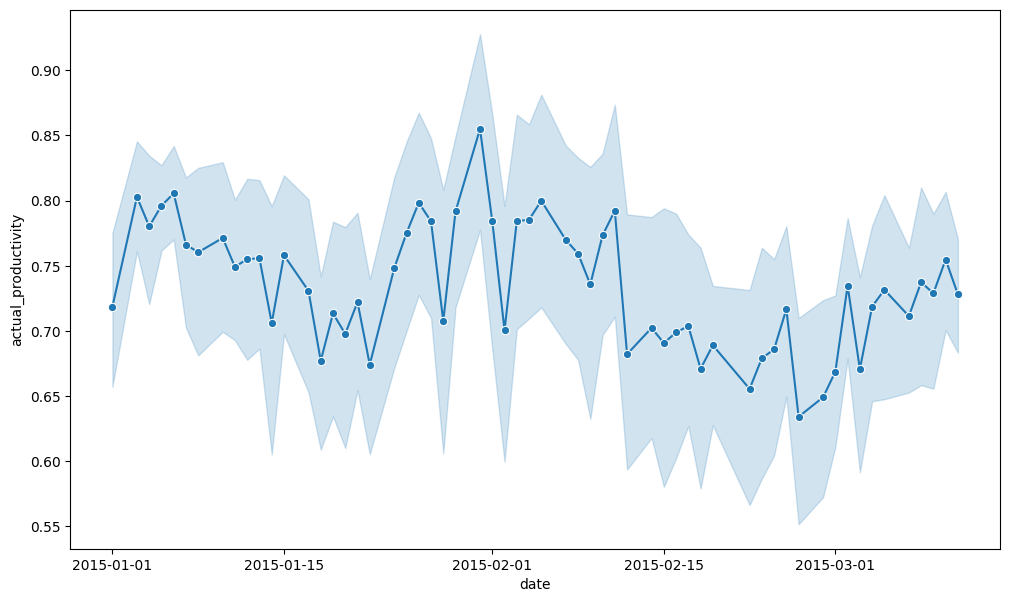

In [583]:
prod['date'] = pd.to_datetime(prod['date'])
plt.figure(figsize=(12,7))
sns.lineplot(x='date', y='actual_productivity', data=prod, marker='o')
plt.show()

"Date," "Quarter," and "Day" columns will be dropped from our dataset because the "Date" column is incomplete for a full-year cycle. Following our initial data exploration, we will now proceed to eliminate the columns that are considered irrelevant for our analysis.

Regarding the "Date" column, even though it offers insights into the observation period from January 1, 2015, to March 11, 2015, due to its limited duration, we will exclude the column as it may not yield sufficient predictive power.
However, if the column encompassed observations for all twelve months of the year, it could have been valuable in identifying seasonal patterns, such as potential declines in productivity during the winter season, thereby enhancing predictive capabilities.

We've made the decision to exclude the columns "idle_time" and "idle_men" from our dataset. These columns predominantly consist of non-zero values in a relatively small number of observations (18 instances). As a result, they exhibit a high degree of uniformity and provide limited informative value to our analysis.

Subsequently, we will eliminate the "no_of_style_change" column, as it encompasses merely 147 observations with minimal variations (1 or 2). Hence, it doesn't contribute significant information and can be excluded from the dataset.

In [584]:
prod2 = prod.drop(columns=['date','idle_time','idle_men'])
prod2

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59,0.940725,January
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0,8,0.886500,January
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0,30,0.800570,January
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0,30,0.800570,January
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0,56,0.800382,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0,8,0.628333,March
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0,8,0.625625,March
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0,8,0.625625,March
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0,15,0.505889,March


3.10 Department Feature

In [585]:
prod2['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [586]:
#Finishing shows 2 types but it is the same spelling. This is because there is a space around one of them and
#it is read as another type
prod2['department'] = prod2['department'].str.strip()
# Change 'sweing' to 'sewing', spelling it correctly
prod2.loc[prod2.department=='sweing', 'department'] = 'sewing'

# View results
dept_table = prod2.department.value_counts().reset_index()
dept_table.rename(columns = {'index':'department', 'department':'total_num'},inplace=True)
dept_table

,department,total_num
0,sewing,691
1,finishing,506


In [587]:
fig = px.box(prod2, x="department", y="over_time")

fig.update_layout(title_text='Overtime spent(in hours) vs Departments',xaxis_title = 'Department',yaxis_title='Overtime in minutes', title_x=0.5,font=dict(
        family="Courier New, monospace",
        size=18,
        color="mediumvioletred"
    ))

fig.show()
#Interactive diagram. Point on objects

Department displays outliers data

In [588]:
prod_dept = px.bar(prod2, x="department", y="actual_productivity", barmode="group", color="department",
             facet_col="quarter")
prod_dept.update_layout(title_text='Productivity of departments in each quarter',title_x=0.5,font=dict(
        family="Courier New, monospace",
        size=18,
        color="maroon"
    ))

prod_dept.show()
#Interactive diagram. Point on objects

In [589]:
from plotly.graph_objs import Pie
Pie_chart = go.Figure(data=[go.Pie(labels=dept_table.department.to_list(),
                             values=dept_table.total_num.to_list())])
Pie_chart.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=25,
                  marker=dict(colors=['purple', 'yellow'], line=dict(color='#000000', width=2)))
Pie_chart.show()
#Interactive diagram. Point on objects

3.11 VIEWING THE TARGETED AND ACTUAL PRODUCTIVITY FEATURES

In [590]:
tprod = px.histogram(prod2, x="targeted_productivity", nbins=20, template='plotly_dark')
tprod.update_layout(title='Distribution of Targeted productivity', title_x=0.5)
tprod.show()

In [591]:
aprod = px.violin(prod2, y="actual_productivity", box=True, points='all')
aprod.update_layout(title='actual_productivity distribution', title_x=0.5)
aprod.show()

THE ABOVE DIAGRAM SHOWS THERE ARE DATA VALUES ABOVE 1 IN THE ACTUAL DATA
THIS IS NOT AS DESCRIBED BY THE DATA PRODUCERS WHICH SAID IT IS BETWEEN 0 AND 1
EXTRACTING THE VALUES ABOVE 1

In [592]:
#Looking for actual_productivity above 1
aprod1 = prod2[prod2['actual_productivity'] > 1]
aprod1

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,month
337,Quarter3,finishing,Tuesday,5,0.70,4.15,0.0,1440,0,0,8,1.033570,January
437,Quarter4,finishing,Monday,3,0.75,3.94,0.0,1800,0,0,10,1.059621,January
456,Quarter4,sewing,Tuesday,2,0.75,22.52,1635.0,6840,119,0,57,1.000230,January
457,Quarter4,sewing,Tuesday,3,0.75,22.52,1299.0,6840,119,0,57,1.000230,January
477,Quarter4,sewing,Wednesday,2,0.80,22.52,1559.0,6840,90,0,57,1.000230,January
478,Quarter4,sewing,Wednesday,3,0.80,22.52,1350.0,6840,113,0,57,1.000230,January
498,Quarter4,sewing,Thursday,2,0.80,22.52,1416.0,6840,113,0,57,1.000230,January
518,Quarter4,sewing,Saturday,3,0.80,22.52,1136.0,6960,113,0,58,1.000457,January
519,Quarter4,sewing,Saturday,2,0.80,22.52,1397.0,6840,113,0,57,1.000230,January
542,Quarter1,finishing,Sunday,8,0.65,4.15,0.0,960,0,0,8,1.011562,February


In [593]:
aprod1.shape

(37, 13)

There are 37 observations in your dataset where the actual productivity exceeds 1, which contradicts the expected range of 0 to 1. This discrepancy could be due to various factors, such as data entry errors, measurement inaccuracies, or instances where workers significantly exceeded anticipated productivity levels.

To address this issue, it is removed from further analysis.

Dropped the rows with Productivity greater than 1

In [594]:
prod3 = prod2.loc[prod2['actual_productivity'] <= 1]

Those that met their target will be 1 and others 0.
The actual_productivity column will be renamed as productivity

In [595]:
prod3['actual_productivity'] = (prod3['actual_productivity'] - prod3['targeted_productivity'])
prod3['actual_productivity'] = (prod3['actual_productivity']>= 0).astype(int)
prod3 = prod3.rename(columns={'actual_productivity': 'productivity'})

prod3

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,productivity,month
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59,1,January
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0,8,1,January
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0,30,1,January
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0,30,1,January
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0,56,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0,8,0,March
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0,8,0,March
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0,8,0,March
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0,15,0,March


4. ENCODING THE NON-NUMERICAL DATA

In [596]:
prod4=prod3

In [597]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the selected column
prod4["quarter"] = label_encoder.fit_transform(prod4["quarter"])
prod4["department"] = label_encoder.fit_transform(prod4["department"])
prod4["day"] = label_encoder.fit_transform(prod4["day"])

In [598]:
prod4.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,productivity,month
0,0,1,3,8,0.80,26.16,1108.0,7080,98,0,59,1,January
1,0,0,3,1,0.75,3.94,0.0,960,0,0,8,1,January
2,0,1,3,11,0.80,11.41,968.0,3660,50,0,30,1,January
3,0,1,3,12,0.80,11.41,968.0,3660,50,0,30,1,January
4,0,1,3,6,0.80,25.90,1170.0,1920,50,0,56,1,January


In [599]:
print(prod4['quarter'].unique())
print(prod4['department'].unique())
print(prod4['day'].unique())

[0 1 2 3]
[1 0]
[3 1 2 0 4 5]


5. EXPLORATORY DATA ANALYSIS



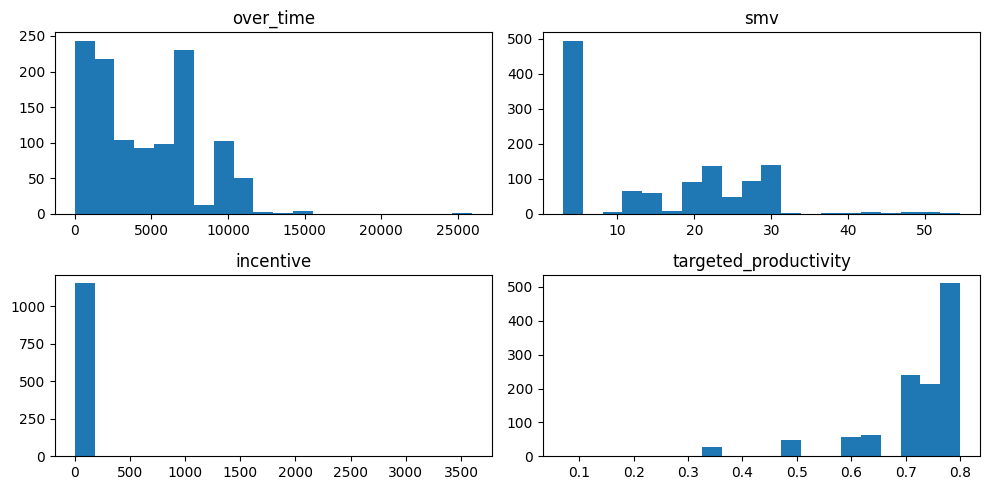

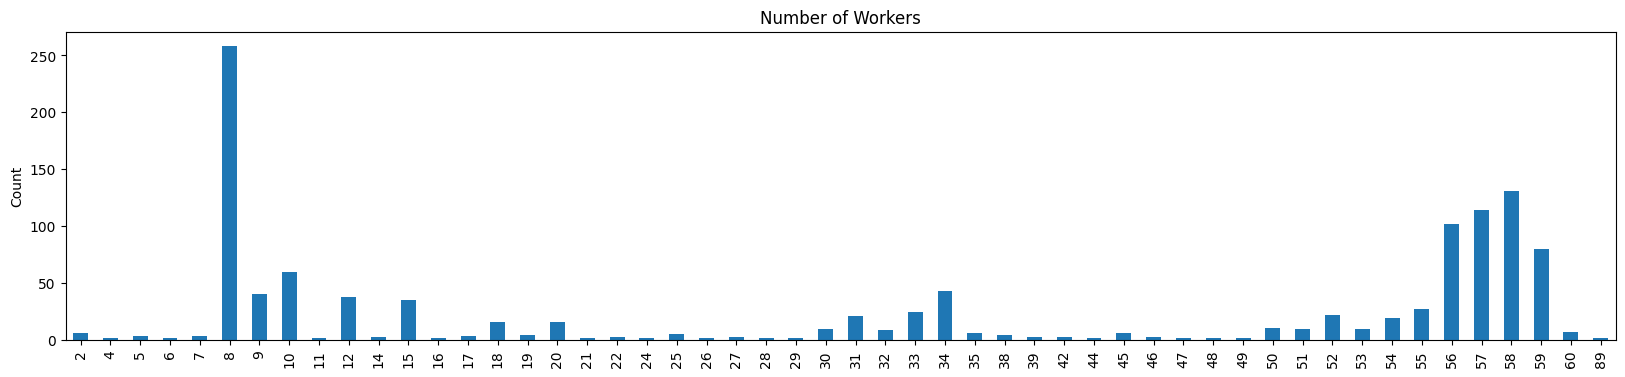

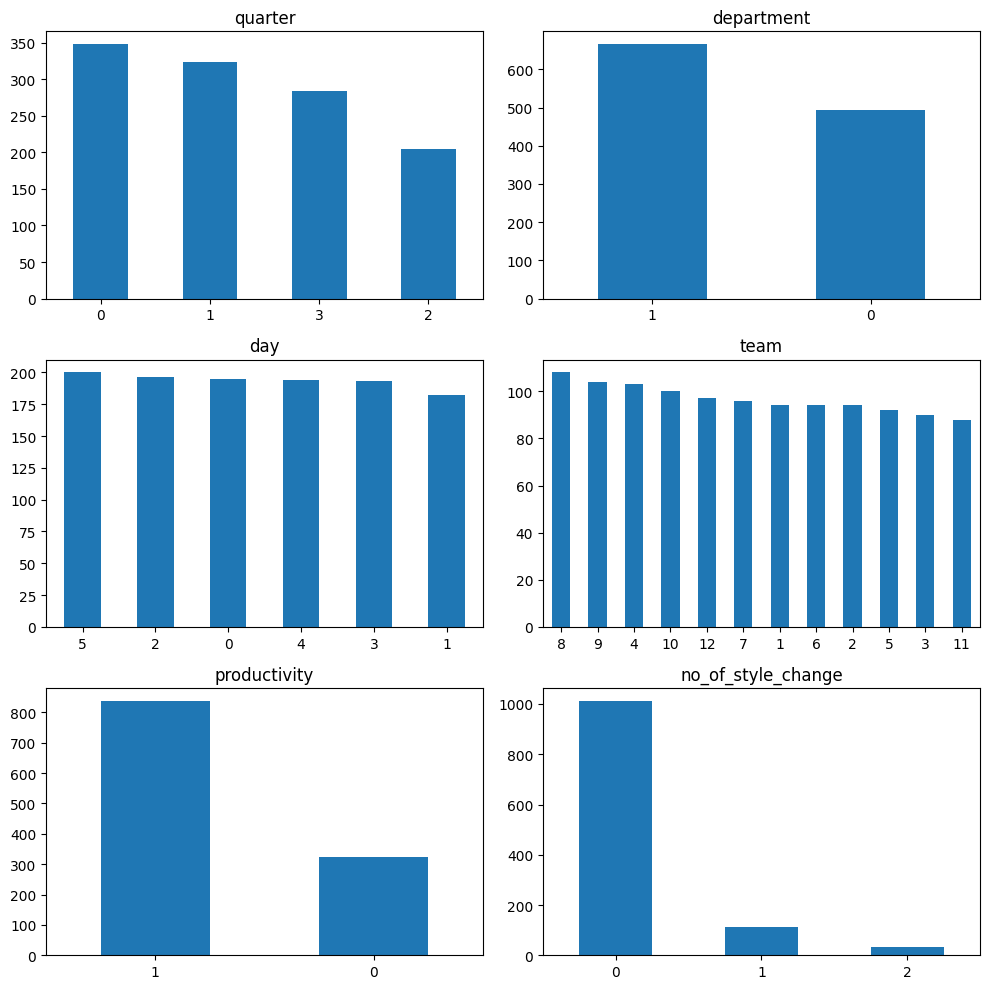

In [600]:
#CONTINUOUS DATA COLUMNS
data_cont = prod4[['over_time', 'smv', 'incentive', 'targeted_productivity']]

# Define number of rows and columns
num_rows = 2
num_cols = 2

# Define figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5))

# Create histograms
for i, col in enumerate(data_cont):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.hist(prod3[col], bins=20)
    ax.set_title(col)


fig.tight_layout()
plt.show()

#INTEGER DATA COLUMN
# Create a figure with the desired size
fig, ax = plt.subplots(figsize=(20, 4))

# Create a bar plot
prod4['no_of_workers'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_title('Number of Workers')
ax.set_xlabel('')
ax.set_ylabel('Count')

plt.show()

#CATEGORICAL DATA COLUMN
data_cat = prod4[['quarter', 'department', 'day', 'team', 'productivity','no_of_style_change']]
# Create bar plot for 'cat_cols'
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(data_cat):
    prod3[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=0)

# Remove unused axes
for j in range(len(data_cat), len(axes.flat)):
    fig.delaxes(axes.flat[j])


plt.tight_layout()
plt.show()

6.1 Checking for outliers in the features


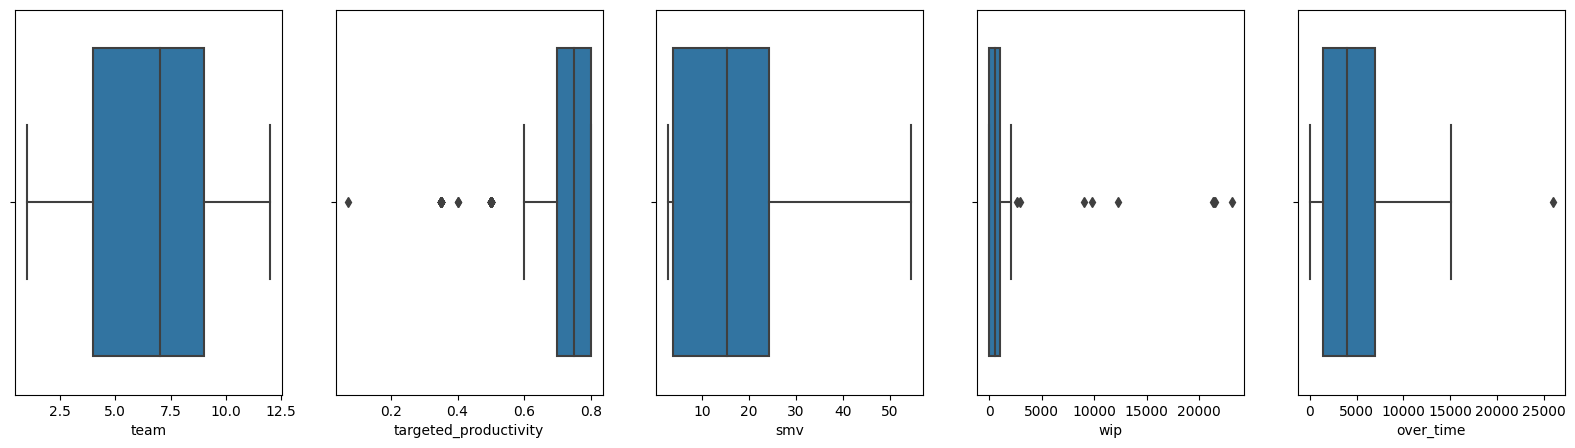

In [601]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
col_names = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time']

for col, ax in zip(col_names, axes):
    sns.boxplot(data=prod4, x=col, ax=ax, orient="v")

plt.show()

These are the observations

Most of workers have overtime durations within the range of -25.92 to 1296 minutes, with 252 workers in this category. Beyond 1296 minutes, the number of workers significantly decreases, and no workers have overtime durations in the last six specified ranges, indicating a drop-off in longer overtime durations..

The majority of workers fall within an SMV (Standard Minute Value) range of 2.847 to 5.483, with 506 workers in this category. Fewer workers have SMV scores outside this range, and there are no workers in the last two specified ranges. This suggests a concentration of SMV values in the middle range.

Almost all of the incentive values in the dataset are in the range of -3.601 to 180, with 1187 observations falling within this range. This suggests that most incentives given to workers are relatively small. High-value incentives are rare in the dataset, as there are only a few observations with such values.

Nearly all of the workers achieved a targeted productivity score within the range of 0.764 to 0.8, with 540 workers in this category. Fewer workers attained productivity scores outside of this range, and no workers reached productivity scores in the last two specified ranges. This indicates a concentration of workers around the 0.764 to 0.8 productivity range.

In [602]:
prod5 = prod4.drop(columns=['no_of_style_change','month'])

In [603]:
prod5_summary = prod3.describe()
prod5_summary

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,productivity
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.00000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,1.365517,0.574138,2.525000,6.544828,0.727905,15.01481,665.985345,4575.301724,37.012931,0.155172,34.290517,0.722414
std,1.150091,0.494686,1.715602,3.422968,0.098735,11.00475,1457.764493,3363.475857,162.300882,0.433766,22.138342,0.448001
min,0.000000,0.000000,0.000000,1.000000,0.070000,2.90000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,1.000000,4.000000,0.700000,3.94000,0.000000,1440.000000,0.000000,0.000000,9.000000,0.000000
50%,1.000000,1.000000,3.000000,7.000000,0.750000,15.26000,565.000000,3960.000000,0.000000,0.000000,34.000000,1.000000
75%,2.000000,1.000000,4.000000,9.000000,0.800000,24.26000,1070.500000,6960.000000,50.000000,0.000000,57.000000,1.000000
max,3.000000,1.000000,5.000000,12.000000,0.800000,54.56000,23122.000000,25920.000000,3600.000000,2.000000,89.000000,1.000000


6.2 Removing Outliers

In [604]:
outlier_cols = ["targeted_productivity", "wip"] # Columns with outliers
def remove_outliers(prod5, col):
    q1 = prod5_summary[col].loc["25%"]
    q3 = prod5_summary[col].loc["75%"]
    inter_qr = q3 - q1
    lower_bound = q1 - (1.5 * inter_qr)
    upper_bound = q3 + (1.5 * inter_qr)
    prod5 = prod5[(prod5[col] >= lower_bound) & (prod5[col] <= upper_bound)]
    return prod5

for col in outlier_cols:
    prod5 = remove_outliers(prod5, col)
prod5

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,productivity
0,0,1,3,8,0.80,26.16,1108.0,7080,98,59,1
1,0,0,3,1,0.75,3.94,0.0,960,0,8,1
2,0,1,3,11,0.80,11.41,968.0,3660,50,30,1
3,0,1,3,12,0.80,11.41,968.0,3660,50,30,1
4,0,1,3,6,0.80,25.90,1170.0,1920,50,56,1
...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,10,0.75,2.90,0.0,960,0,8,0
1193,1,0,5,8,0.70,3.90,0.0,960,0,8,0
1194,1,0,5,7,0.65,3.90,0.0,960,0,8,0
1195,1,0,5,9,0.75,2.90,0.0,1800,0,15,0


7.1 Target feature balance check

In [605]:
prod5['productivity'].value_counts()

1    767
0    305
Name: productivity, dtype: int64

7.2 Oversampling to balance the target variable

In [606]:
#Oversampling
X = prod5.drop(columns=['productivity'])
y = prod5['productivity']
smote=SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)
print(sorted(Counter(y_smote).items()))

[(0, 767), (1, 767)]


In [607]:
from pandas.core.reshape import concat
prod6 = pd.concat([X_smote,y_smote], axis= 1)
prod6.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,productivity
0,0,1,3,8,0.80,26.16,1108.0,7080,98,59,1
1,0,0,3,1,0.75,3.94,0.0,960,0,8,1
2,0,1,3,11,0.80,11.41,968.0,3660,50,30,1
3,0,1,3,12,0.80,11.41,968.0,3660,50,30,1
4,0,1,3,6,0.80,25.90,1170.0,1920,50,56,1


8. CORRELATION

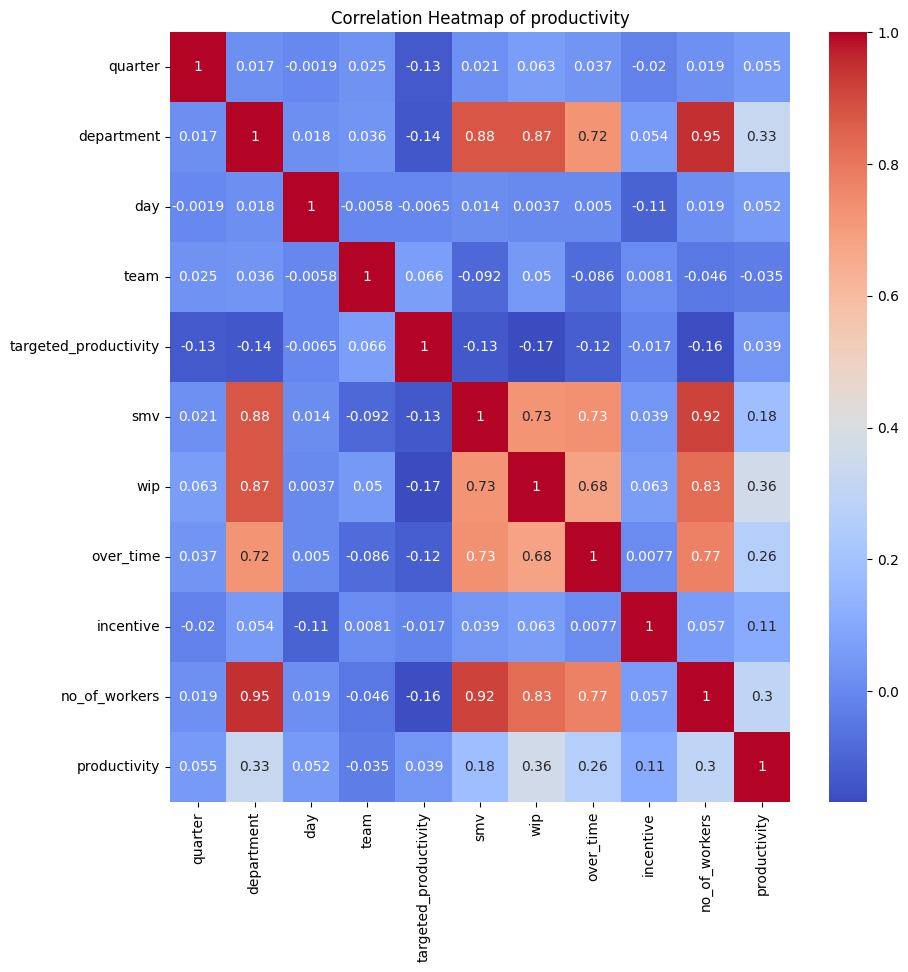

Index(['productivity', 'wip', 'department', 'no_of_workers', 'over_time',
       'smv', 'incentive', 'quarter', 'day', 'targeted_productivity', 'team'],
      dtype='object')
[1.         0.36340325 0.32599207 0.30114149 0.26291993 0.181488
 0.10926508 0.05511965 0.05241348 0.03888249 0.03524571]


In [608]:
correlation_matrix = prod6.corr()

# Create heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap of productivity')

# Display the plot
plt.show()
print(prod6.corr().abs().nlargest(11,'productivity').index)
print(prod6.corr().abs().nlargest(11,'productivity').values[:,10])

9. FEATURE SELECTION

9.1 Ridge CV

Ridge Regression Error: 0.21096


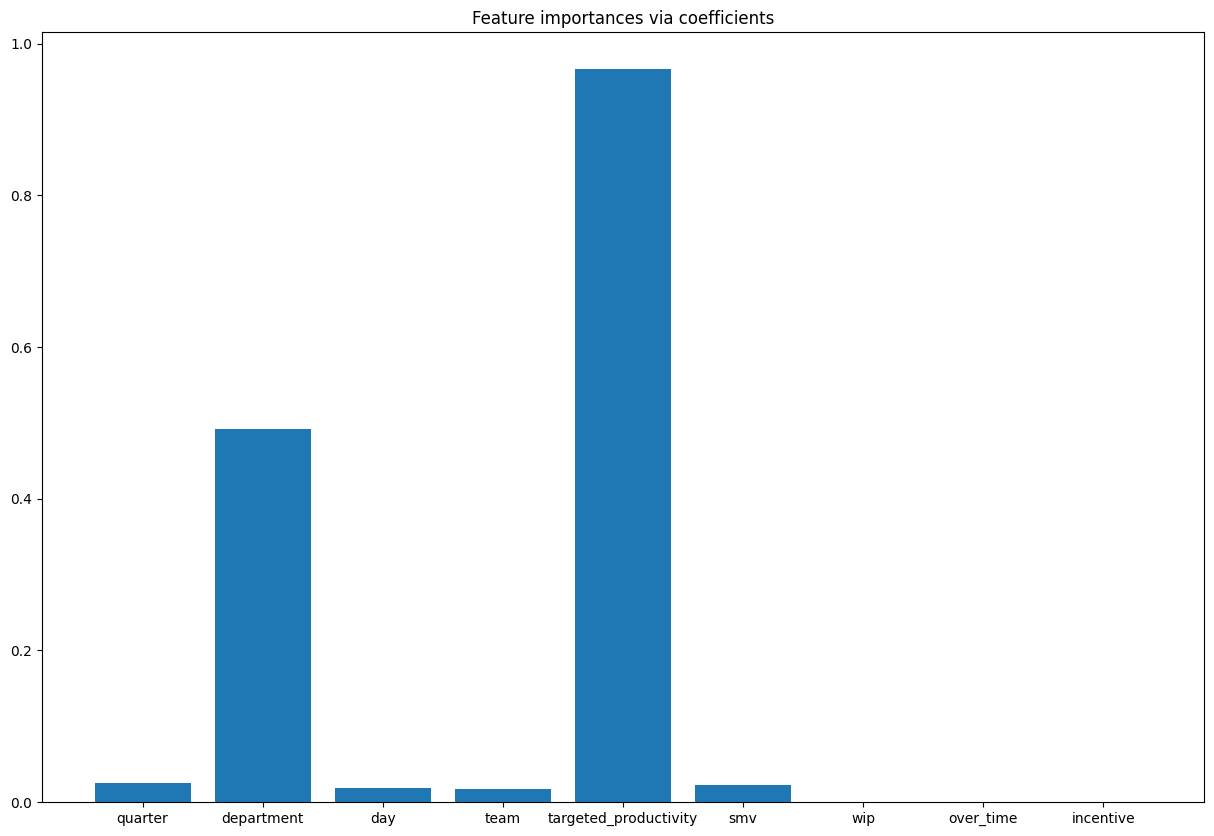

In [609]:
import warnings
warnings.filterwarnings("ignore")
Xsfs = prod6.iloc[:,0:9]
ysfs = prod6.iloc[:,-1]

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV # RidgeCV = GridSearchCV + Ridge (for regression)


ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(Xsfs, ysfs)
print("Ridge Regression Error: %.5f" % (ridge.score(Xsfs, ysfs)))

importance = np.abs(ridge.coef_)
feature_names = np.array(Xsfs.columns)
plt.figure(figsize = (15,10))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

9.2 PCA

In [610]:
# Normalization for PCA analysis
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Fitting only on training and test data
prod6_scale = scale.fit_transform(Xsfs)

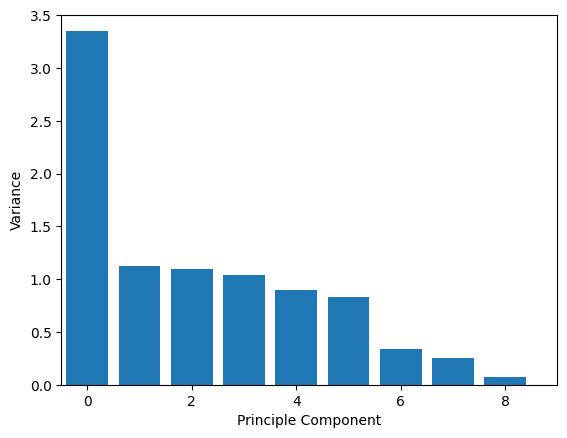

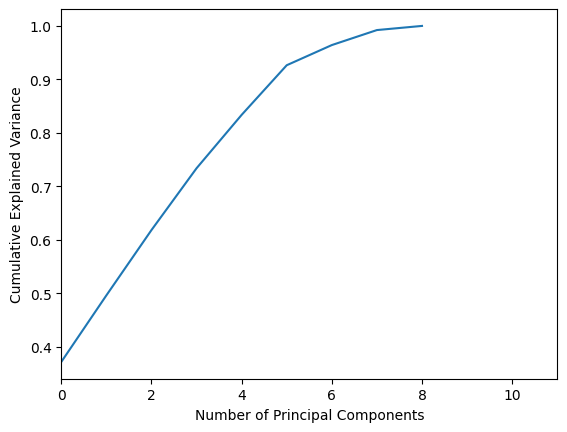

In [611]:
#PRINCIPAL COMPONENT ANALYSIS
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components= 9)
pca.fit(prod6_scale)

# Plot explained variance
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('Principle Component')
plt.ylabel('Variance')
plt.xlim([-0.5, 9])
plt.ylim([0,3.5])
#plt.savefig('pca1.png')
plt.show()

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 11, emit=True)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
#plt.savefig('pca2.png')
plt.show()

9.3 PPCA

In [612]:
# Function for PPCA
def probabilistic_pca(X, n_components=None):
    n_samples, n_features = X.shape

    if n_components is None:
        n_components = min(n_samples, n_features)

    # Center the data
    X_mean = X.mean(axis=0)
    X_centered = X - X_mean

    # Compute the PPCA model
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    S = S[:n_components]
    U = U[:, :n_components]
    Vt = Vt[:n_components, :]

    explained_variance = np.sum(S ** 2) / (n_samples - 1)
    W = U * np.sqrt(S)
    sigma = np.sqrt((1 / (n_samples - 1)) * np.sum(np.square(X_centered - X_centered.dot(Vt.T).dot(Vt))))

    return W, X_mean, Vt, sigma, explained_variance


n_components_ppca = None  # Automatically estimate the number of components
W, X_mean, Vt, sigma, explained_variance = probabilistic_pca(prod6, n_components_ppca)

# Identify the best features based on loadings
best_features = np.argmax(np.abs(W), axis=0)
best_feature_indices = np.argsort(best_features)

print("Feature indices with the highest loadings:")
for i, feature_index in enumerate(best_feature_indices):
    print(f"Feature {feature_index + 1} has a loading of {W[feature_index, i]}")


Feature indices with the highest loadings:
Feature 11 has a loading of 7.861171687360578
Feature 1 has a loading of 2.330765095371073
Feature 5 has a loading of 0.14298144141136215
Feature 2 has a loading of -0.13604510695556102
Feature 6 has a loading of -0.030487296437455846
Feature 7 has a loading of 0.41386338468197953
Feature 9 has a loading of -0.056001980156800364
Feature 4 has a loading of -0.21828846158353798
Feature 8 has a loading of -0.09633575260950566
Feature 3 has a loading of -0.14733193547405
Feature 10 has a loading of -0.00067885792445677


PCA and PPCA agrees that only the top 2 features is the most significant to use. However, using the PCA graph that swerved significantly on te 5th component and PPCA analysis, the 5th most correlated showed the last positive correlation, hence the top 5 correlated feature will be used.

---



9.4 Remove the unneeded features and view the correlation

In [613]:
#keeping the top 5 features
prod7 = prod6.drop(columns=['incentive', 'quarter', 'day', 'targeted_productivity', 'team'])

In [614]:
prod7.head()

,department,smv,wip,over_time,no_of_workers,productivity
0,1,26.16,1108.0,7080,59,1
1,0,3.94,0.0,960,8,1
2,1,11.41,968.0,3660,30,1
3,1,11.41,968.0,3660,30,1
4,1,25.90,1170.0,1920,56,1


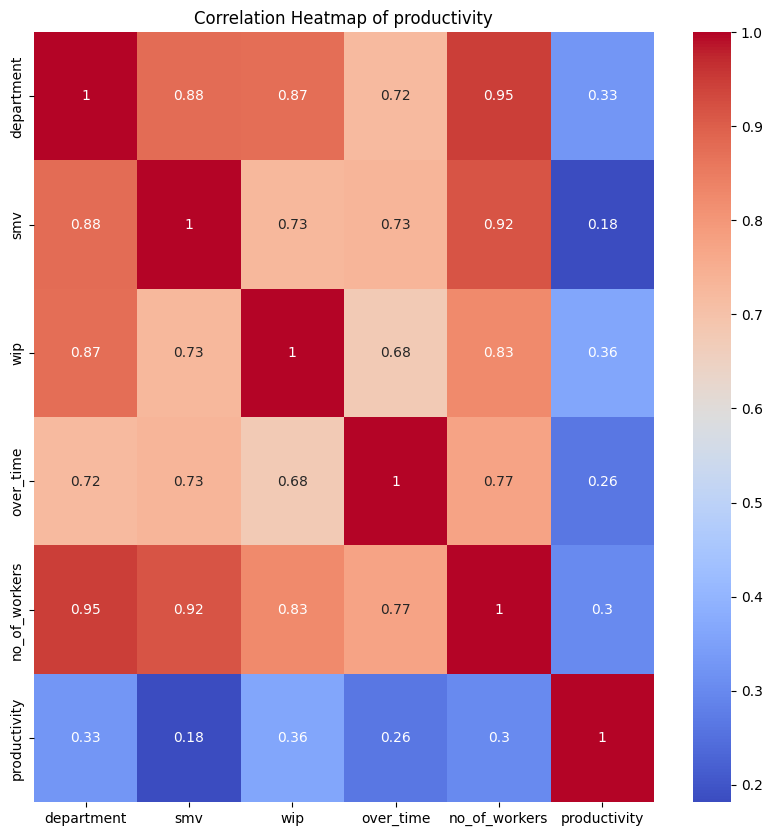

Index(['productivity', 'wip', 'department', 'no_of_workers', 'over_time',
       'smv'],
      dtype='object')
[0.17293332 0.73485448 0.87244828 0.91344985 0.68662409 1.        ]


In [615]:
correlation_matrix = prod7.corr()

# Create heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap of productivity')

# Display the plot
plt.show()
print(prod5.corr().abs().nlargest(6,'productivity').index)
print(prod5.corr().abs().nlargest(6,'productivity').values[:,5])

The above Correlation is better than that of Section 8. And they are all positive.

10. PAIRPLOT

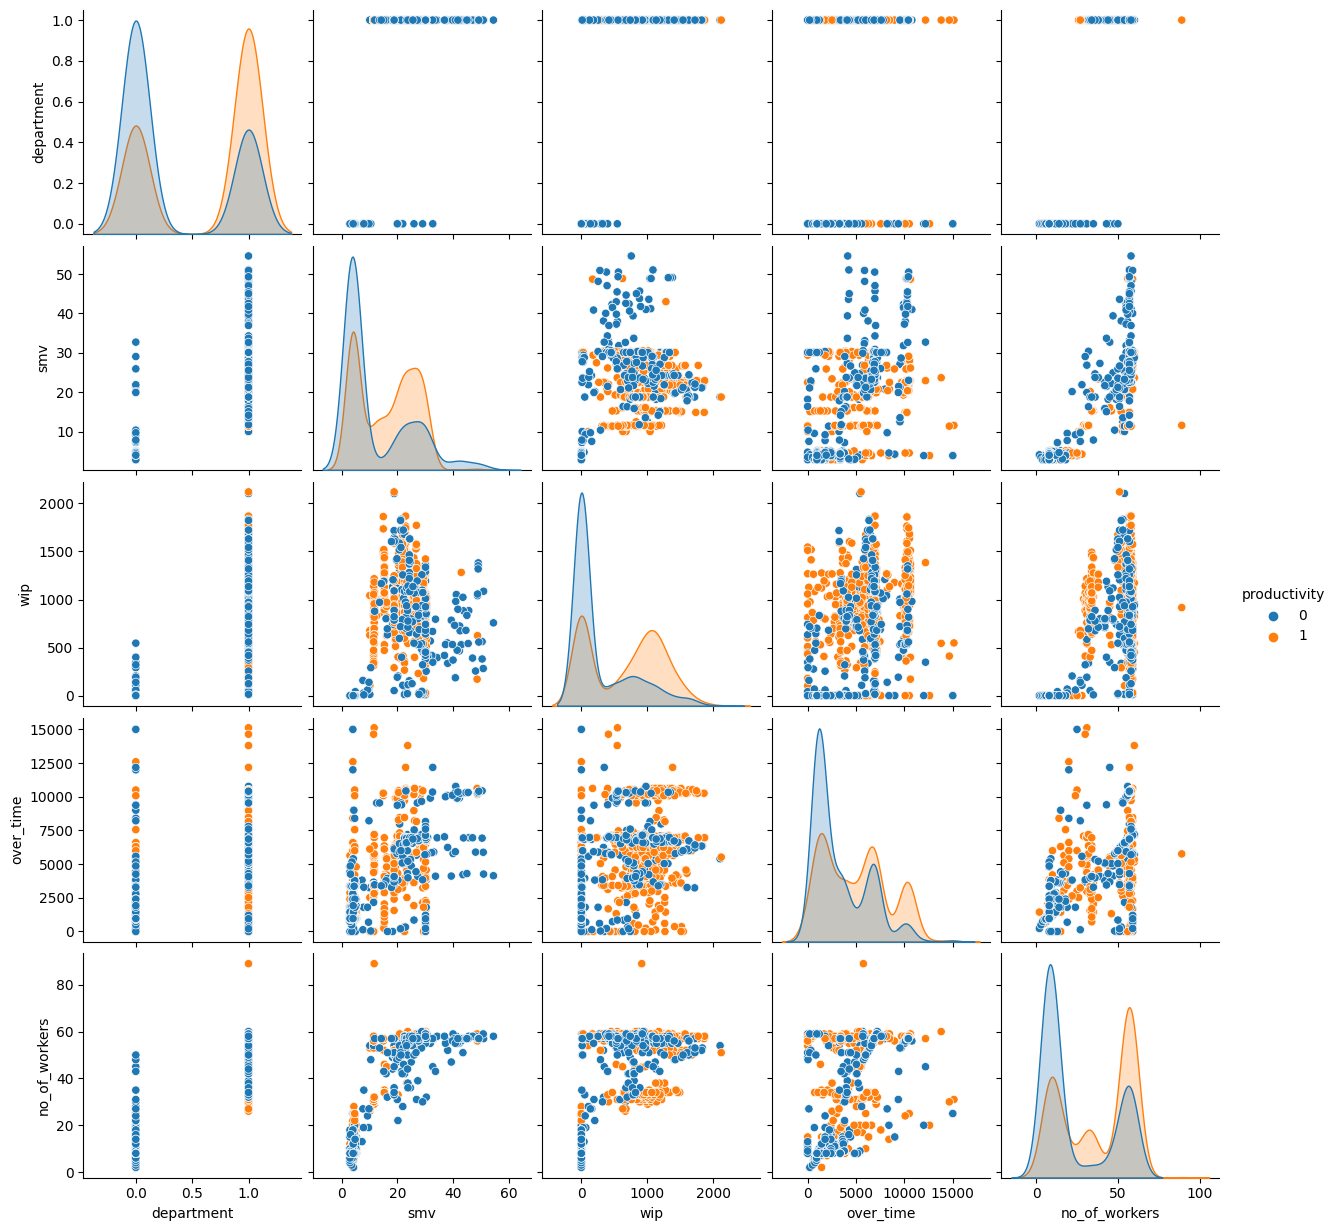

In [616]:
#VISUALIZE THE SELECTED FEATURES THROUGH PAIRPLOT TO DISPLAY THEIR RELATIONSHIPS
# Create a pair plot
sns.pairplot(prod7, hue='productivity')

# Display the plot
plt.show()

11. PROCESSING FOR CLASSIFICATION

In [617]:
#4)Train-Test Splitting
# Split into X and Y datasets.
XX = prod7.drop('productivity', axis = 1)
yy = prod7['productivity']

In [618]:
# Split data into training and testing sets.
XTrain, XTest, yTrain, yTest = train_test_split(XX, yy, test_size = 0.30, random_state = 42)

In [619]:
# Normalization for processing
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Fitting only on training and test data
XTrain = scale.fit_transform(XTrain)
XTest = scale.fit_transform(XTest)

In [620]:
def evaluate_classifier(model):

    # Predict probabilities for the test data
    y_pred = model.predict(XTest)
    ll = log_loss(yTest,(model.predict_proba(XTest)))
    print("log_loss: {:.2f}".format(ll))

    print('-----------------------------------------------------------------')
    tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    g_measure = (2 * precision * recall) / (precision + recall)

    # Print other evaluation metrics as percentages
    print("Recall/Sensitivity: %.2f" % recall_score(yTest, y_pred))
    print("F1 Score: %.2f" % f1_score(yTest, y_pred))
    print("Precision: %.2f" % precision_score(yTest, y_pred))
    print("Specificity: %.2f" % specificity)

    print('-----------------------------------------------------------------')

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(yTest, y_pred)

    # Calculate the AUC-ROC
    auc_roc = auc(fpr, tpr)

    # Print the AUC-ROC
    print("AUC-ROC: %.2f" % (auc_roc))
    # Compute confusion matrix
    cm = confusion_matrix(yTest, y_pred)

    # Create a confusion matrix plot
    labels = np.unique(y)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    # Set plot labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()



    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

12. GAUSSIAN PROCESS CLASSIFICATION

GPC RBF
Mean Accuracy: 0.71 (0.06)
Log Marginal Likelihood (optimized): -583.64
log_loss: 0.57
-----------------------------------------------------------------
Recall/Sensitivity: 0.76
F1 Score: 0.71
Precision: 0.67
Specificity: 0.63
-----------------------------------------------------------------
AUC-ROC: 0.69


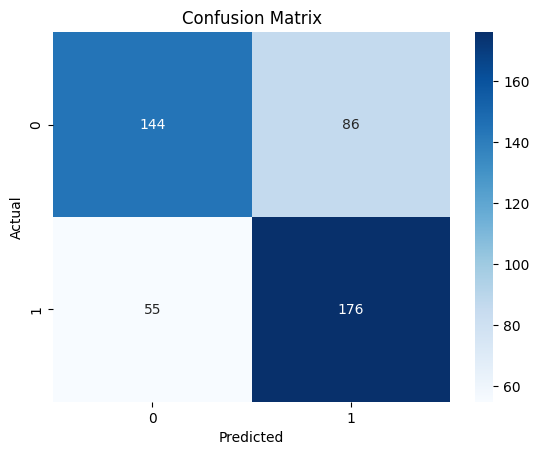

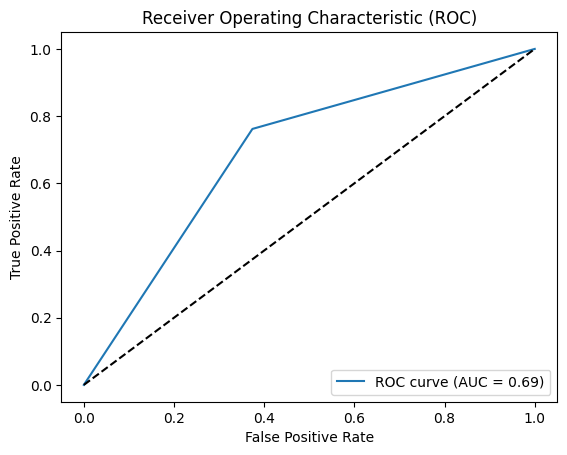

-----------------------------------------------------------------


In [621]:
# evaluate a gaussian process classifier model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.gaussian_process import GaussianProcessClassifier

model = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, XTest, yTest, scoring='accuracy', cv=cv, n_jobs=-1)
print('GPC RBF')
print('Mean Accuracy: %.2f (%.2f)' % (mean(scores), std(scores)))
model.fit(XTrain, yTrain)
print(
      "Log Marginal Likelihood (optimized): %.2f"
      % model.log_marginal_likelihood(model.kernel_.theta)
      )
evaluate_classifier(model)
print('-----------------------------------------------------------------')

In [622]:
GPC = {'Kernels': ['RBF'],
     'Accuracy' : [0.71],
     'LML': [-583.64],
     'Log_Loss' : [0.57],
     'Recall' : [0.76],
     'F1_Score': [0.71],
      'Precision' : [0.67],
     'Specificity': [0.63],
     'ROC/AUC': [0.69]
    }
gpc_results = pd.DataFrame(data=GPC)
gpc_results

,Kernels,Accuracy,LML,Log_Loss,Recall,F1_Score,Precision,Specificity,ROC/AUC
0,RBF,0.71,-583.64,0.57,0.76,0.71,0.67,0.63,0.69


GAUSSIAN PROCESS CLASSIFIER RESULTS

13. OTHER MACHINE LEARNING MODELS

13.1 DECISION TREE

Best Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} Best Score: 0.63%
log_loss: 0.63
-----------------------------------------------------------------
Recall/Sensitivity: 0.58
F1 Score: 0.64
Precision: 0.71
Specificity: 0.77
-----------------------------------------------------------------
AUC-ROC: 0.67


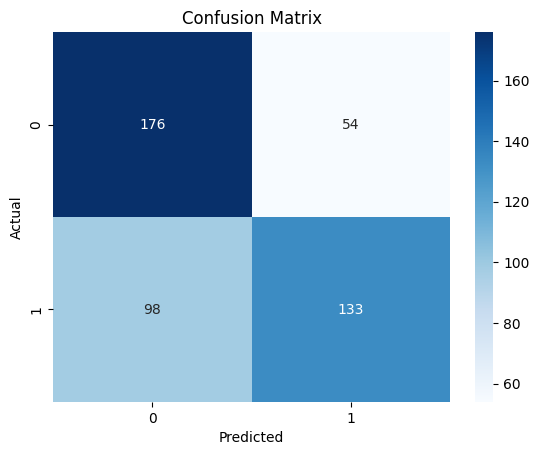

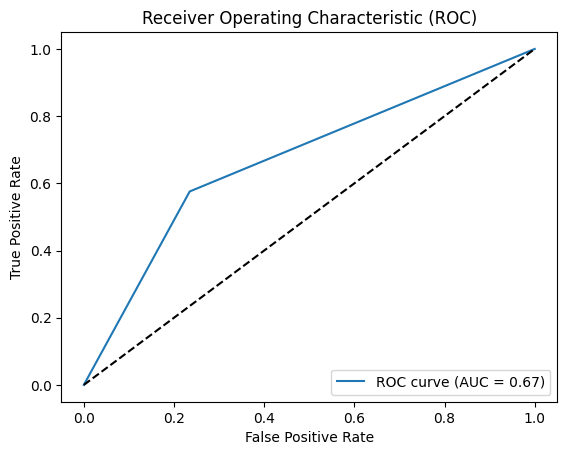

In [623]:
param = {
    'criterion': ['gini', "entropy"],
    'max_depth': [i for i in range(5, 51, 5)],
    'min_samples_leaf': [i for i in range(2, 11, 1)],
    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5]
}
dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6)
dt.fit(XTrain, yTrain)
print('Best Decision Tree Classifier:', dt.best_params_, 'Best Score: %.2f%%' % dt.best_score_)

evaluate_classifier(dt)

13.2 Logistic Regression

Best Logistic Regresion Classifier: {'C': 10, 'penalty': 'l2'} Best Score: 0.70%
log_loss: 0.59
-----------------------------------------------------------------
Recall/Sensitivity: 0.59
F1 Score: 0.66
Precision: 0.74
Specificity: 0.79
-----------------------------------------------------------------
AUC-ROC: 0.69


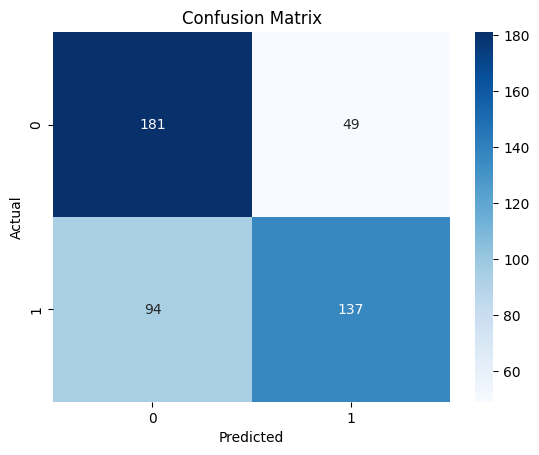

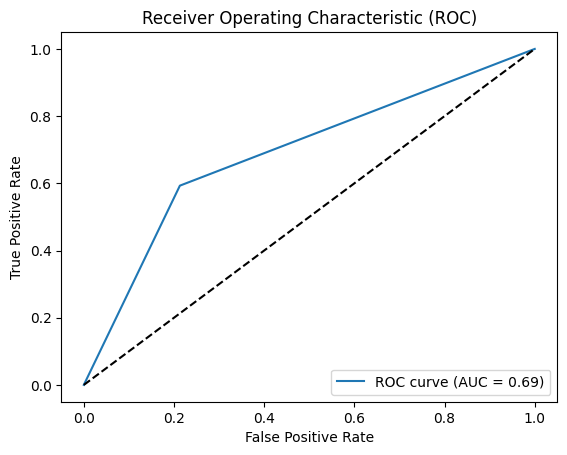

In [624]:
param_rg = {
    'penalty': ['l1','l2'],
    'C': [c / 10.0 for c in range(1, 10, 1)] + list(range(10, 101, 1))
}
lr = GridSearchCV(LogisticRegression(), param_grid=param_rg, cv=5) # default scoring: accuracy_score
lr.fit(XTrain, yTrain)
print('Best Logistic Regresion Classifier:', lr.best_params_,  'Best Score: %.2f%%' % lr.best_score_)
evaluate_classifier(lr)

13.3 SVM

Best SVM_SVC: {'C': 1, 'max_iter': 200} Best Score:0.71%
log_loss: 0.67
-----------------------------------------------------------------
Recall/Sensitivity: 0.47
F1 Score: 0.54
Precision: 0.64
Specificity: 0.73
-----------------------------------------------------------------
AUC-ROC: 0.60


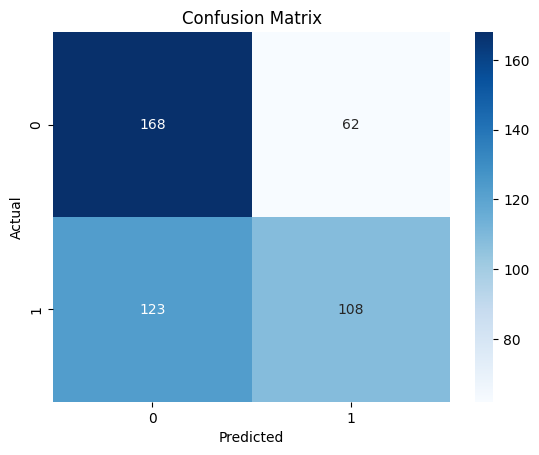

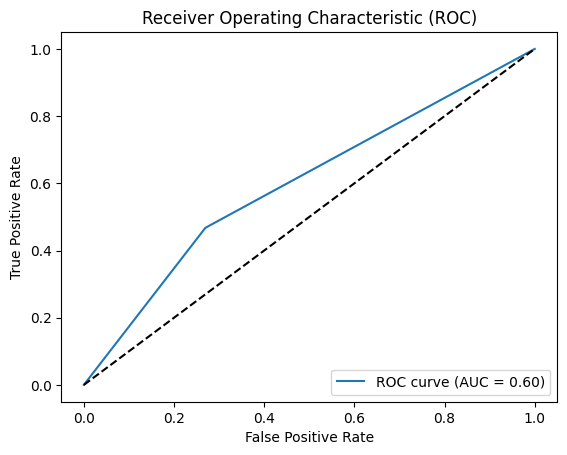

In [625]:
param_svm = {
    "C": list(range(1,5)),
    "max_iter": list(range(100, 1001, 100))
}

svm = GridSearchCV(SVC(probability=True), param_grid=param_svm, cv=2) # default scoring: accuracy_score
svm.fit(XTrain, yTrain)
print('Best SVM_SVC:', svm.best_params_, 'Best Score:%0.2F%%'% svm.best_score_)
evaluate_classifier(svm)

13.4 Naive Bayes

Best NB Classifier: {'var_smoothing': 0.01} Best Score: 0.66%
log_loss: 1.02
-----------------------------------------------------------------
Recall/Sensitivity: 0.63
F1 Score: 0.64
Precision: 0.66
Specificity: 0.67
-----------------------------------------------------------------
AUC-ROC: 0.65


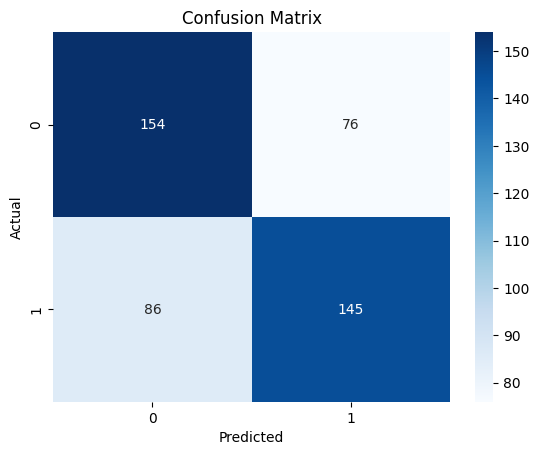

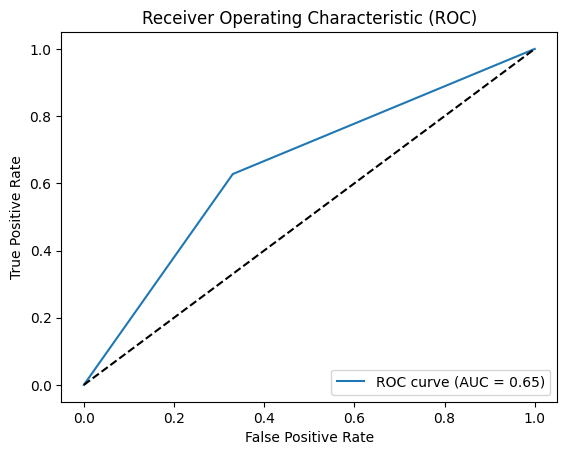

In [626]:
param_nb = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

nb = GridSearchCV(GaussianNB(), param_nb, cv=2)
nb.fit(XTrain, yTrain)
print('Best NB Classifier:', nb.best_params_,  'Best Score: %.2f%%' % nb.best_score_)
evaluate_classifier(nb)


13.5 Random Forest

Best RF Classifier: {'criterion': 'entropy', 'n_estimators': 100} Best Score: 0.80%
log_loss: 0.59
-----------------------------------------------------------------
Recall/Sensitivity: 0.71
F1 Score: 0.69
Precision: 0.67
Specificity: 0.65
-----------------------------------------------------------------
AUC-ROC: 0.68


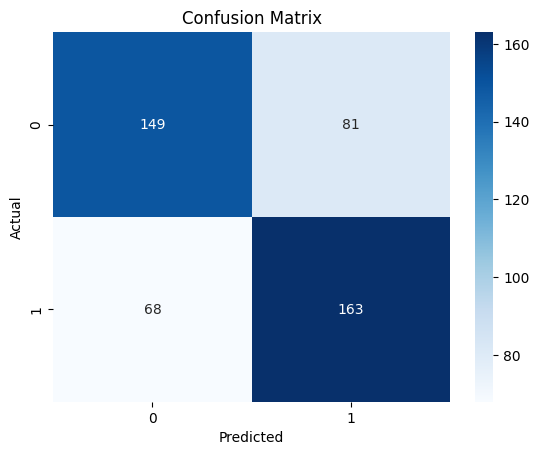

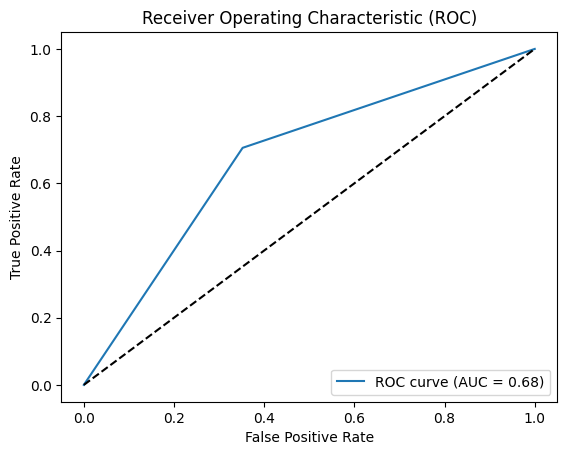

In [627]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
    "criterion": ["gini", "entropy"],
    "n_estimators": list(range(100, 500, 100))
}

rf = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, cv=2)
rf.fit(XTrain, yTrain)
print('Best RF Classifier:', rf.best_params_,  'Best Score: %.2f%%' % rf.best_score_)
evaluate_classifier(rf)


13.6 KNN

best_k = 5
KNN Accuracy: 0.68
log_loss: 0.75
-----------------------------------------------------------------
Recall/Sensitivity: 0.71
F1 Score: 0.69
Precision: 0.67
Specificity: 0.64
-----------------------------------------------------------------
AUC-ROC: 0.68


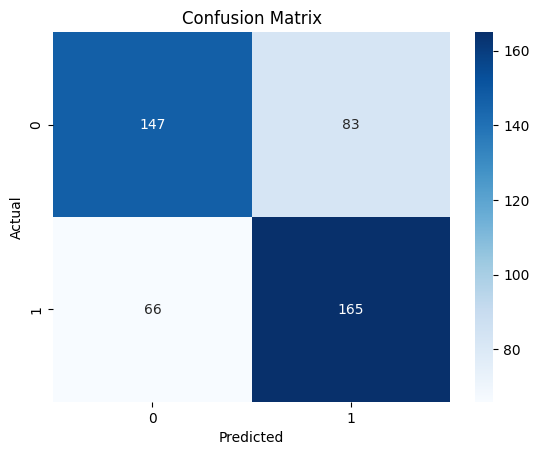

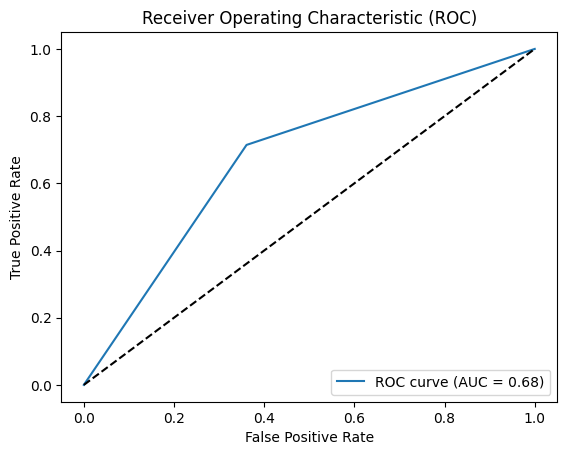

In [628]:
from sklearn.neighbors import KNeighborsClassifier

# Applying & fine tuning K-Nearest Neighbor

best_score = 0.0

best_k = -1

for k in range(1, 11):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(XTrain, yTrain)

    score = knn.score(XTest, yTest)

    if score > best_score:

        best_k = k

        best_score = score

print("best_k = " + str(best_k))
# Evaluate the accuracy of the classifier
print("KNN Accuracy: %.2f" % score)
evaluate_classifier(knn)

In [629]:
mlc = {'Classifiers': ['GPC','Decision Tree','Logistic_Regression', 'SVM','Naive_Bayes','Random_Forest',
                   'KNN'],
     'Accuracy' : [0.71,0.63,0.70,0.71,0.66,0.81,0.68],
     'Log_Loss' : [0.57,0.63,0.59,0.67,1.02,0.61,0.75],
     'Recall' : [0.76,0.58,0.59,0.47,0.63,0.69,0.71],
     'F1_Score': [0.71,0.64,0.66,0.54,0.64,0.68,0.69],
      'Precision' : [0.67,0.71,0.74,0.64,0.66,0.67,0.67],
     'Specificity': [0.63,0.77,0.79,0.73,0.67,0.66,0.64],
     'ROC/AUC': [0.69,0.67,0.69,0.60,0.65,0.67,0.68]
    }
mlc_results = pd.DataFrame(data=mlc)
mlc_results

,Classifiers,Accuracy,Log_Loss,Recall,F1_Score,Precision,Specificity,ROC/AUC
0,GPC,0.71,0.57,0.76,0.71,0.67,0.63,0.69
1,Decision Tree,0.63,0.63,0.58,0.64,0.71,0.77,0.67
2,Logistic_Regression,0.70,0.59,0.59,0.66,0.74,0.79,0.69
3,SVM,0.71,0.67,0.47,0.54,0.64,0.73,0.60
4,Naive_Bayes,0.66,1.02,0.63,0.64,0.66,0.67,0.65
5,Random_Forest,0.81,0.61,0.69,0.68,0.67,0.66,0.67
6,KNN,0.68,0.75,0.71,0.69,0.67,0.64,0.68


14  ENSEMBLES: BOOSTING ALGORITMS

Accuracy: 0.75 (+/- 0.04), Model Name[AdaBoost]
log_loss: 0.68
-----------------------------------------------------------------
Recall/Sensitivity: 0.72
F1 Score: 0.74
Precision: 0.75
Specificity: 0.76
-----------------------------------------------------------------
AUC-ROC: 0.74


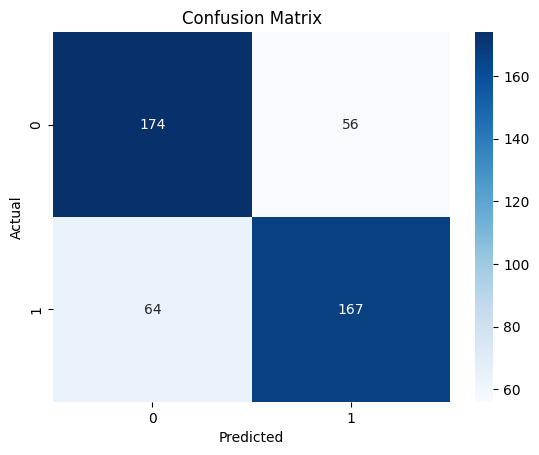

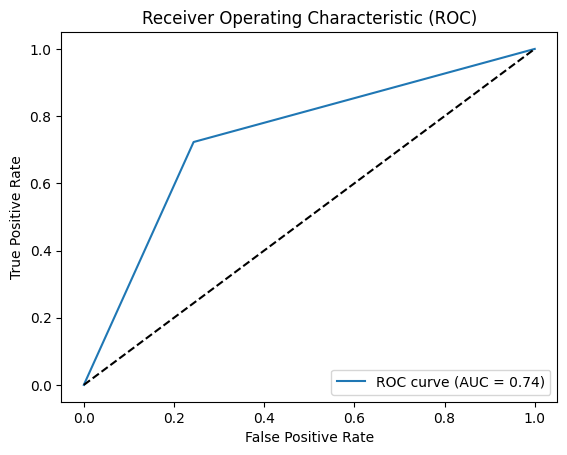

Accuracy: 0.79 (+/- 0.02), Model Name[GBDT]
log_loss: 0.59
-----------------------------------------------------------------
Recall/Sensitivity: 0.72
F1 Score: 0.70
Precision: 0.67
Specificity: 0.65
-----------------------------------------------------------------
AUC-ROC: 0.69


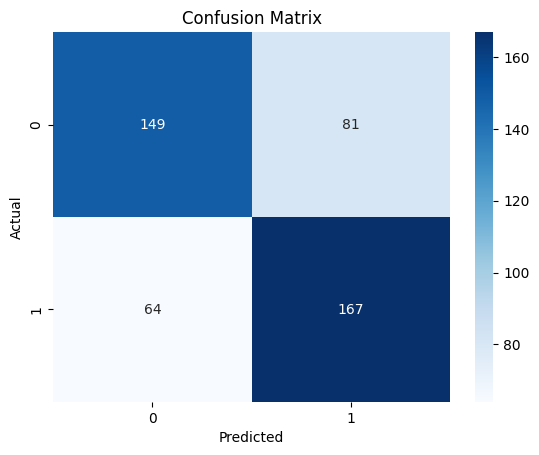

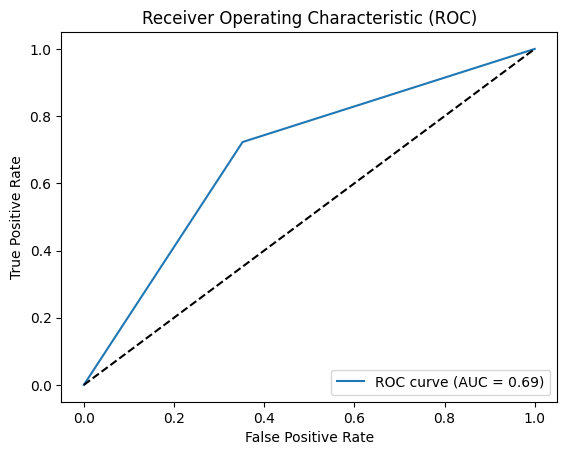

[LightGBM] [Info] Number of positive: 536, number of negative: 537
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 1073, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499534 -> initscore=-0.001864
[LightGBM] [Info] Start training from score -0.001864
[LightGBM] [Info] Number of positive: 482, number of negative: 483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 965, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499482 -> initscore=-0.002073
[LightGBM] [Info] Start training from score -0.002073
[LightGBM] [Warning] No fur

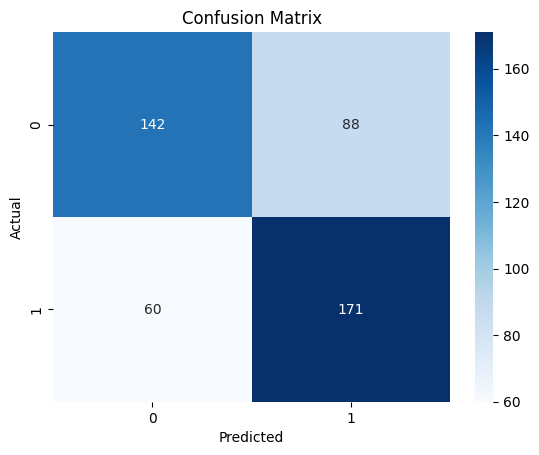

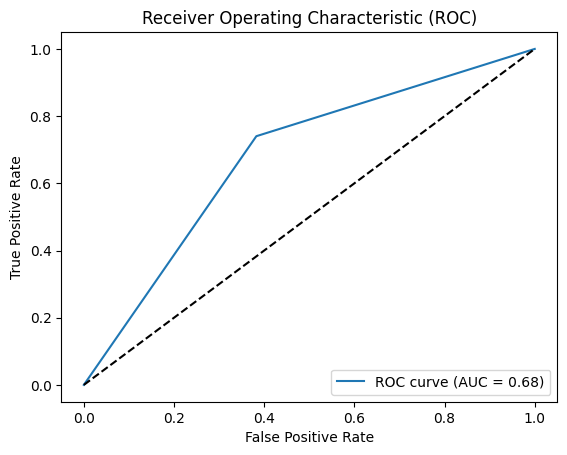

Accuracy: 0.80 (+/- 0.03), Model Name[XGBoost]
log_loss: 0.69
-----------------------------------------------------------------
Recall/Sensitivity: 0.67
F1 Score: 0.70
Precision: 0.74
Specificity: 0.76
-----------------------------------------------------------------
AUC-ROC: 0.71


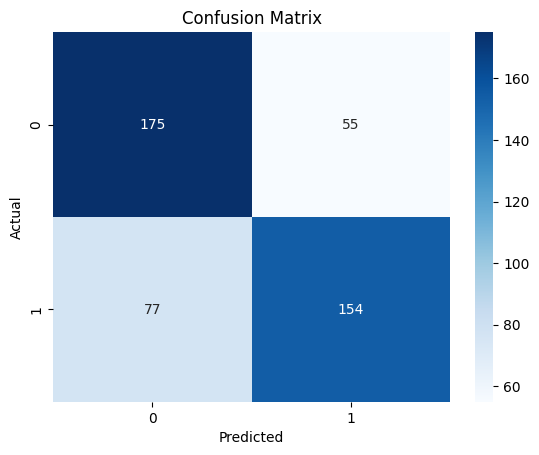

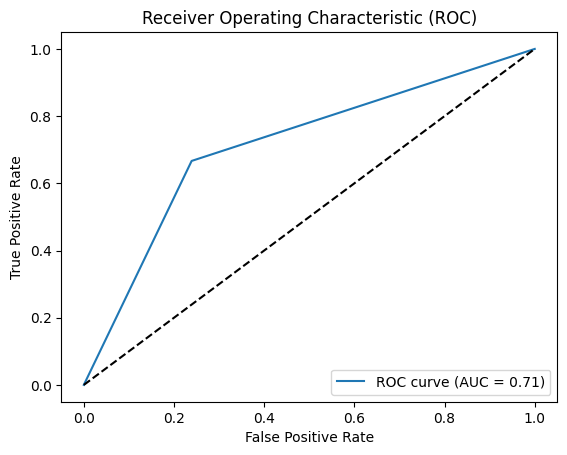

In [630]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
import time
boost1 = AdaBoostClassifier() #  If estimator is not set then it is DecisionTreeClassifier of max_depth=1.
boost2 = GradientBoostingClassifier()
boost3 = LGBMClassifier()
boost4 = XGBClassifier()

for boost, label in zip([boost1, boost2, boost3, boost4], ['AdaBoost', 'GBDT','LightGBM','XGBoost']):
  boost.fit(XTrain,yTrain)
  scores = cross_val_score(boost, XTrain, yTrain, scoring='accuracy', cv=10)
  print("Accuracy: %0.2f (+/- %0.2f), Model Name[%s]" %
          (scores.mean(), scores.std(), label))
  evaluate_classifier(boost)

In [685]:
Boost = {'Boost_Model': ['AdaBoost','GBDT', 'LightGBM','XGBoost'],
     'Accuracy ' : [0.75,0.79,0.81,0.80],
     'Log_Loss' : [0.68,0.59,0.80,0.69],
     'Recall' : [0.72,0.72,0.74,0.67],
     'F1_Score': [0.74,0.70,0.70,0.70],
      'Precision' : [0.75,0.67,0.66,0.74],
     'Specificity': [0.76,0.65,0.62,0.76],
     'ROC/AUC': [0.74,0.69,0.68,0.71]
    }
Boost_results = pd.DataFrame(data=Boost)
Boost_results

,Boost_Model,Accuracy,Log_Loss,Recall,F1_Score,Precision,Specificity,ROC/AUC
0,AdaBoost,0.75,0.68,0.72,0.74,0.75,0.76,0.74
1,GBDT,0.79,0.59,0.72,0.70,0.67,0.65,0.69
2,LightGBM,0.81,0.80,0.74,0.70,0.66,0.62,0.68
3,XGBoost,0.80,0.69,0.67,0.70,0.74,0.76,0.71


15. BAGGING

DT's test accuracy: 0.67
log_loss: 1.43
-----------------------------------------------------------------
Recall/Sensitivity: 0.71
F1 Score: 0.69
Precision: 0.66
Specificity: 0.63
-----------------------------------------------------------------
AUC-ROC: 0.67


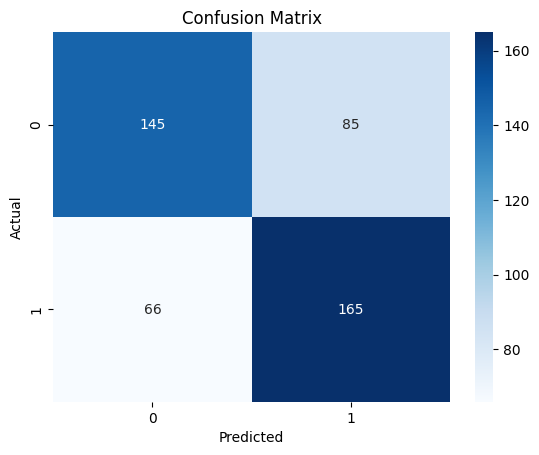

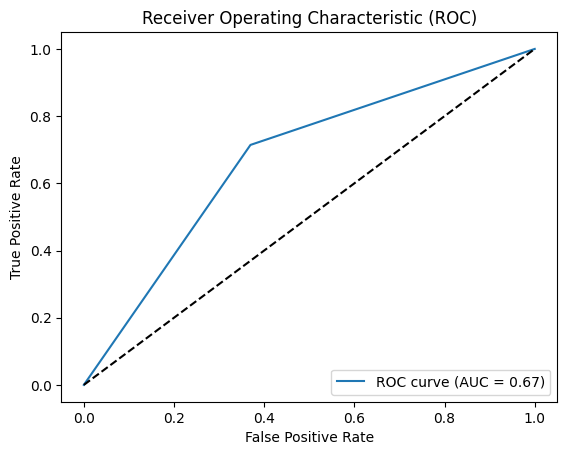

In [651]:
#15.1 BAGGING DECISION TREE

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, bootstrap=True)
dt_bag.fit(XTrain, yTrain)
print("DT's test accuracy: %.2f" % dt_bag.score(XTest, yTest))
evaluate_classifier(dt_bag)

LR's test accuracy: 0.69%
log_loss: 0.59
-----------------------------------------------------------------
Recall/Sensitivity: 0.59
F1 Score: 0.66
Precision: 0.74
Specificity: 0.80
-----------------------------------------------------------------
AUC-ROC: 0.69


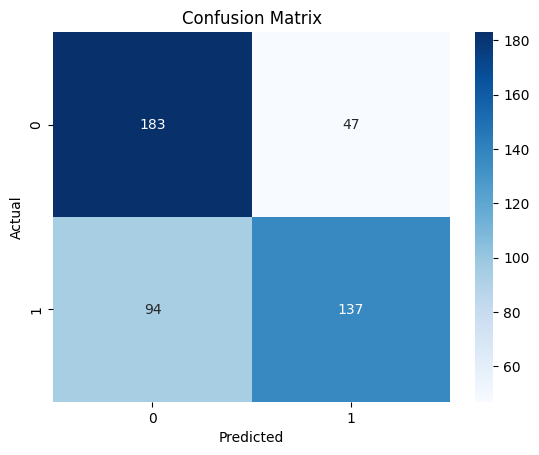

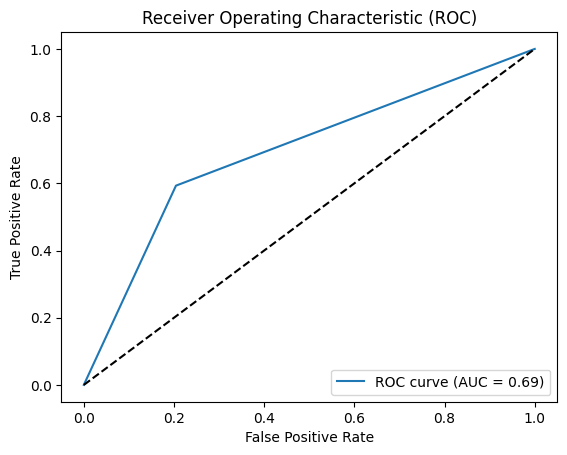

In [633]:
#15.2 BAGGING LOGISTIC REGRESSION

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

lr_bag = BaggingClassifier(LogisticRegression(penalty='l2', C=4.0), n_estimators=500, bootstrap=True)
lr_bag.fit(XTrain, yTrain)
print("LR's test accuracy: %.2f" % lr_bag.score(XTest, yTest))

evaluate_classifier(lr_bag)

SVM's test accuracy: 0.71
log_loss: 0.59
-----------------------------------------------------------------
Recall/Sensitivity: 0.62
F1 Score: 0.68
Precision: 0.75
Specificity: 0.79
-----------------------------------------------------------------
AUC-ROC: 0.71


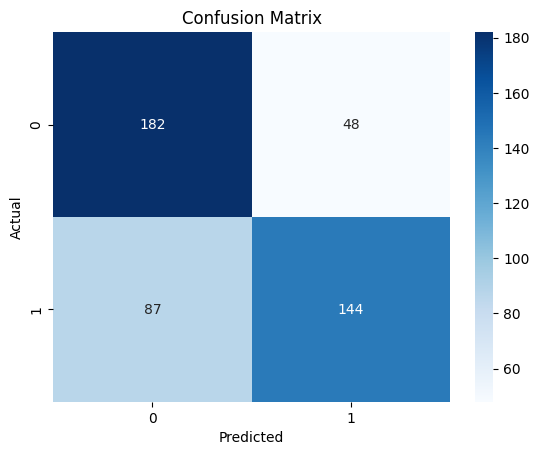

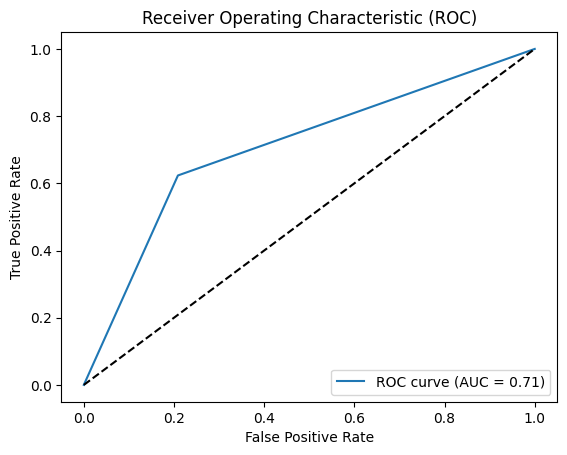

In [666]:
#15.3 BAGGING SVM

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state = 42,probability=True)
svm_bag=BaggingClassifier(base_estimator=svm, n_estimators=6, random_state=14).fit(X,y)
svm_bag.fit(XTrain, yTrain)
print("SVM's test accuracy: %.2f" %  svm_bag.score(XTest, yTest))

evaluate_classifier(svm_bag)

NB's test accuracy: 0.65
log_loss: 1.02
-----------------------------------------------------------------
Recall/Sensitivity: 0.63
F1 Score: 0.64
Precision: 0.66
Specificity: 0.67
-----------------------------------------------------------------
AUC-ROC: 0.65


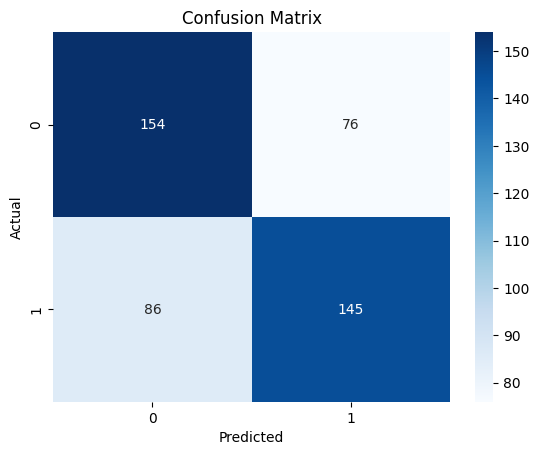

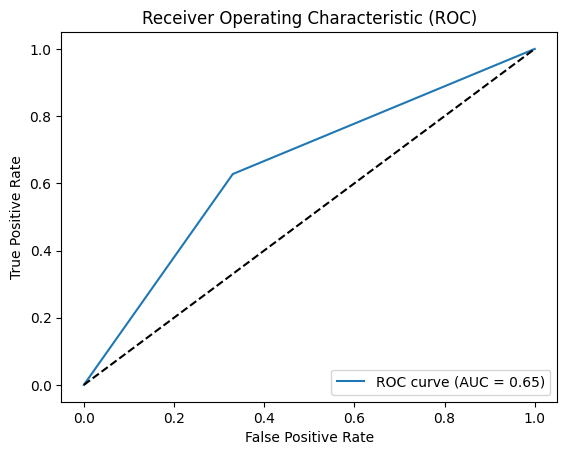

In [667]:
#15.4 BAGGING NAIVE BAYES

nb_bag = BaggingClassifier(GaussianNB(), n_estimators=1000, bootstrap=True)
nb_bag.fit(XTrain, yTrain)
print("NB's test accuracy: %.2f" % nb_bag.score(XTest, yTest))

evaluate_classifier(nb_bag)

RF_BAG's test accuracy: 0.68
log_loss: 0.57
-----------------------------------------------------------------
Recall/Sensitivity: 0.69
F1 Score: 0.69
Precision: 0.68
Specificity: 0.67
-----------------------------------------------------------------
AUC-ROC: 0.68


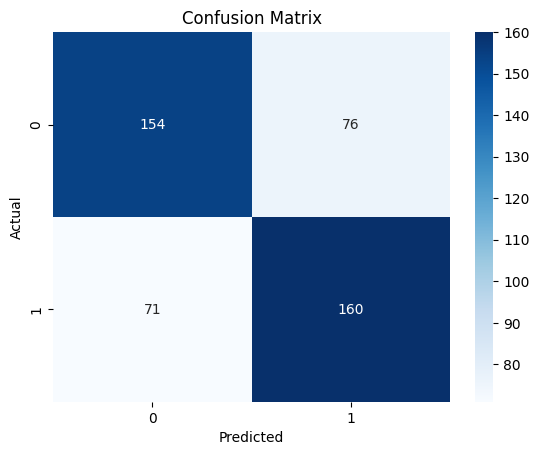

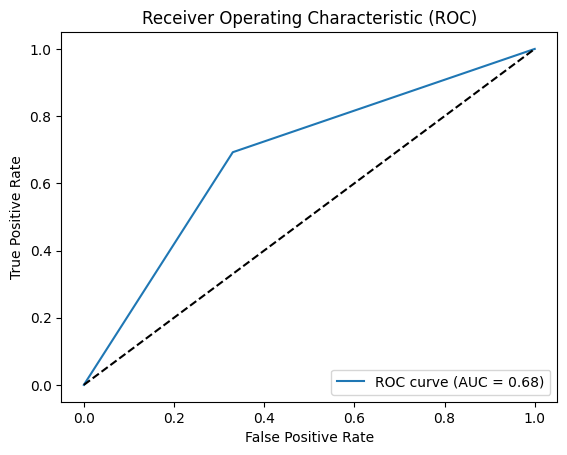

In [668]:
#15.5 BAGGING RANDOM FOREST

from sklearn.ensemble import BaggingClassifier
rf_bag = BaggingClassifier(RandomForestClassifier(bootstrap=True))
#gnb_bag = BaggingClassifier(GaussianNB(n_estimators=1000, bootstrap=True))
rf_bag.fit(XTrain, yTrain)

print("RF_BAG's test accuracy: %.2f" % rf_bag.score(XTest, yTest))
evaluate_classifier(rf_bag)

RF_KNN's test accuracy: 0.70
log_loss: 0.52
-----------------------------------------------------------------
Recall/Sensitivity: 0.83
F1 Score: 0.73
Precision: 0.66
Specificity: 0.57
-----------------------------------------------------------------
AUC-ROC: 0.70


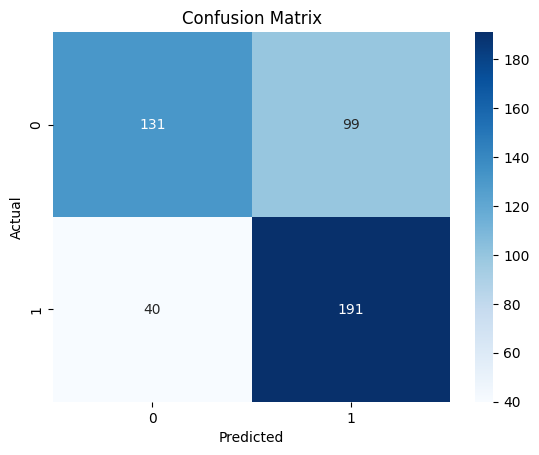

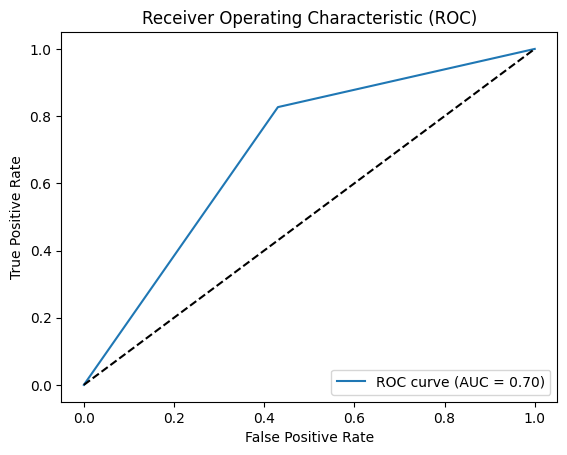

In [669]:
#15.6 BAGGING KNN

from sklearn.ensemble import BaggingClassifier
knn_bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=10))
knn_bag.fit(XTrain, yTrain)

print("RF_KNN's test accuracy: %.2f" % knn_bag.score(XTest, yTest))
evaluate_classifier(knn_bag)

In [674]:
Bagging_class = {'Bagging_Model': ['Decision_Tree','Logistic_Regression', 'SVM','Naive_Bayes','Random_Forest',
                   'KNN'],
     'Accuracy' : [0.67,0.69,0.71,0.65,0.68,0.70],
     'Log_Loss' : [1.43,0.59,0.59,1.02,0.57,0.52],
     'Recall' : [0.71,0.59,0.62,0.63,0.69,0.73],
     'F1_Score': [0.69,0.66,0.68,0.64,0.69,0.73],
      'Precision' : [0.66,0.74,0.75,0.66,0.68,0.66],
     'Specificity': [0.63,0.80,0.79,0.67,0.67,0.67],
     'ROC/AUC': [0.67,0.69,0.71,0.65,0.68,0.70]
    }
Bagging_class_results = pd.DataFrame(data=Bagging_class)
Bagging_class_results

,Bagging_Model,Accuracy,Log_Loss,Recall,F1_Score,Precision,Specificity,ROC/AUC
0,Decision_Tree,0.67,1.43,0.71,0.69,0.66,0.63,0.67
1,Logistic_Regression,0.69,0.59,0.59,0.66,0.74,0.80,0.69
2,SVM,0.71,0.59,0.62,0.68,0.75,0.79,0.71
3,Naive_Bayes,0.65,1.02,0.63,0.64,0.66,0.67,0.65
4,Random_Forest,0.68,0.57,0.69,0.69,0.68,0.67,0.68
5,KNN,0.70,0.52,0.73,0.73,0.66,0.67,0.70


16. USING ADAPTIVE BOOSTING (ADABOOST) TO BOOST MODELS

DT_ADA's test accuracy: 0.63
log_loss: 0.66
-----------------------------------------------------------------
Recall/Sensitivity: 0.68
F1 Score: 0.65
Precision: 0.62
Specificity: 0.58
-----------------------------------------------------------------
AUC-ROC: 0.63


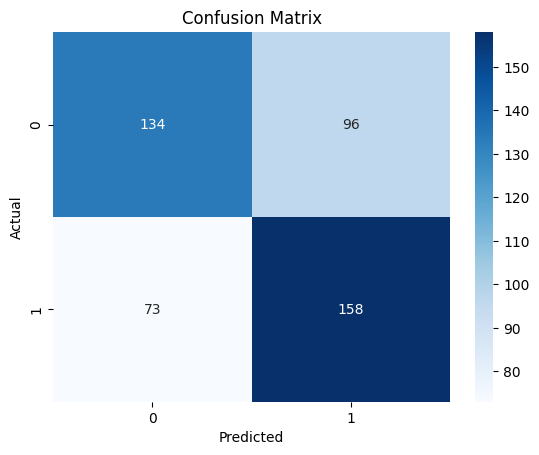

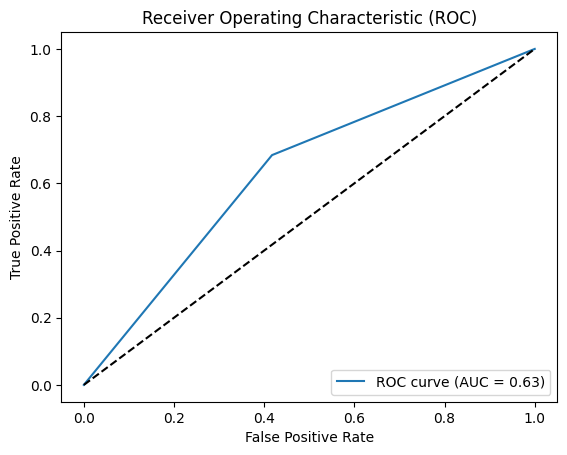

In [675]:
#16.1 ADABOOST ON DECISION TREE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
dt_ada.fit(XTrain, yTrain)

print("DT_ADA's test accuracy: %.2f" % dt_ada.score(XTest, yTest))
evaluate_classifier(dt_ada)

LogReg_ADA's test accuracy: 0.69%
log_loss: 0.69
-----------------------------------------------------------------
Recall/Sensitivity: 0.59
F1 Score: 0.66
Precision: 0.73
Specificity: 0.78
-----------------------------------------------------------------
AUC-ROC: 0.69


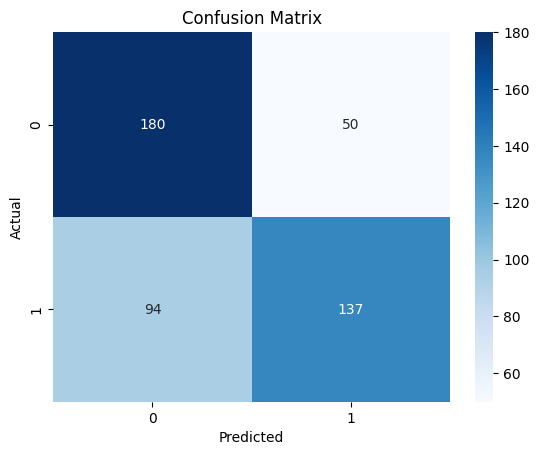

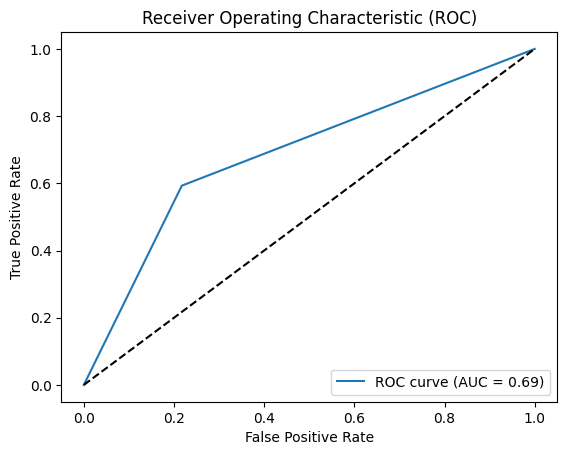

In [676]:
#16.2 ADABOOST ON LOGISTIC REGRESSION

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

lr_ada = AdaBoostClassifier(LogisticRegression(penalty='l2', C=4.0), n_estimators=2500, algorithm="SAMME.R", learning_rate=0.5)
lr_ada.fit(XTrain, yTrain)

print("LogReg_ADA's test accuracy: %.2f%%" % lr_ada.score(XTest, yTest))
evaluate_classifier(lr_ada)

NB_ADA's test accuracy: 0.50%
log_loss: 6.56
-----------------------------------------------------------------
Recall/Sensitivity: 0.00
F1 Score: 0.00
Precision: 0.00
Specificity: 1.00
-----------------------------------------------------------------
AUC-ROC: 0.50


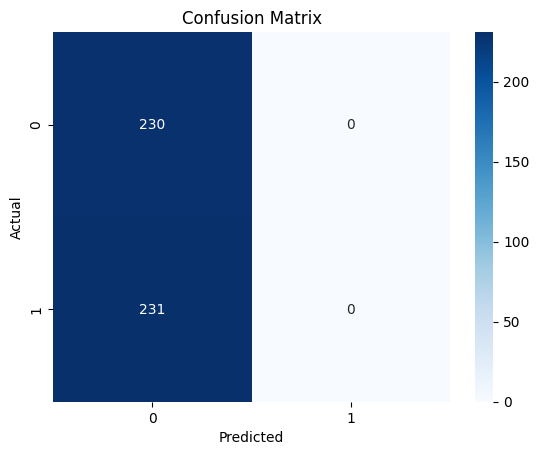

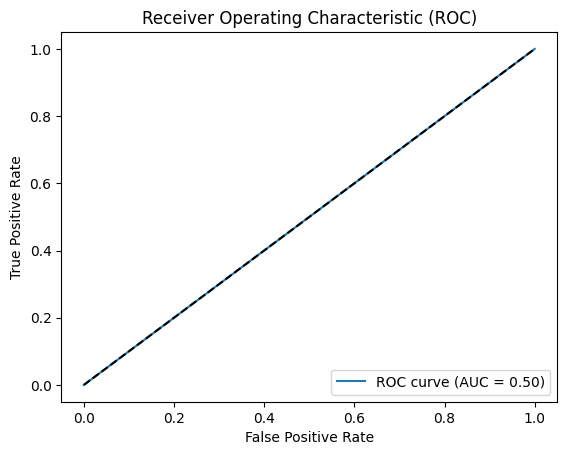

In [677]:
#16.3 ADABOOST ON NB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

nb_ada = AdaBoostClassifier(GaussianNB(), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
nb_ada.fit(XTrain, yTrain)

print("NB_ADA's test accuracy: %.2f%%" % nb_ada.score(XTest, yTest))
evaluate_classifier(nb_ada)

In [682]:
Boosting_class = {'Boosting_Model': ['Decision_Tree','Logistic_Regression','Naive_Bayes'],
     'Accuracy %' : [0.63,0.69,0.50],
     'Log_Loss' : [0.66,0.69,6.59],
     'Recall %' : [0.68,0.59,0.00],
     'F1_Score %': [0.65,0.66,00.0],
      'Precision %' : [0.62,0.73,0.00],
     'Specificity %': [0.58,0.78,1.00],
     'ROC/AUC': [0.63,0.69,0.50]
    }
Boosting_class_results = pd.DataFrame(data=Boosting_class)
Boosting_class_results

,Boosting_Model,Accuracy %,Log_Loss,Recall %,F1_Score %,Precision %,Specificity %,ROC/AUC
0,Decision_Tree,0.63,0.66,0.68,0.65,0.62,0.58,0.63
1,Logistic_Regression,0.69,0.69,0.59,0.66,0.73,0.78,0.69
2,Naive_Bayes,0.50,6.59,0.00,0.00,0.00,1.00,0.50


17. VISUALIZATION OF THE BEST GPC MODELS WITH OTHER ML CLASSIFIERS TO SHOW DECISION BOUNDARIES AND AREAS OF UNCERTAINTIES

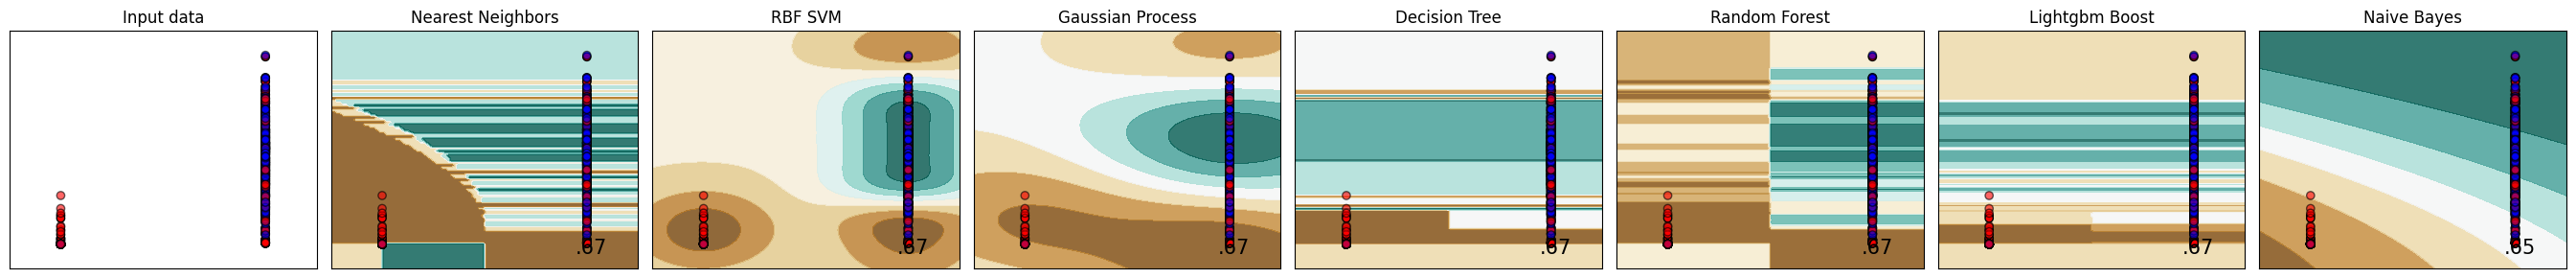

In [643]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Lightgbm Boost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
   LGBMClassifier(random_state=42, verbose= -100),
    GaussianNB(),
]

X = XX.drop(columns=['no_of_workers','over_time', 'smv'])
X = scale.fit_transform(X)
y = prod7['productivity']

linearly_separable = (X,y)

datasets = [linearly_separable]

figure = plt.figure(figsize=(27, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.BrBG
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

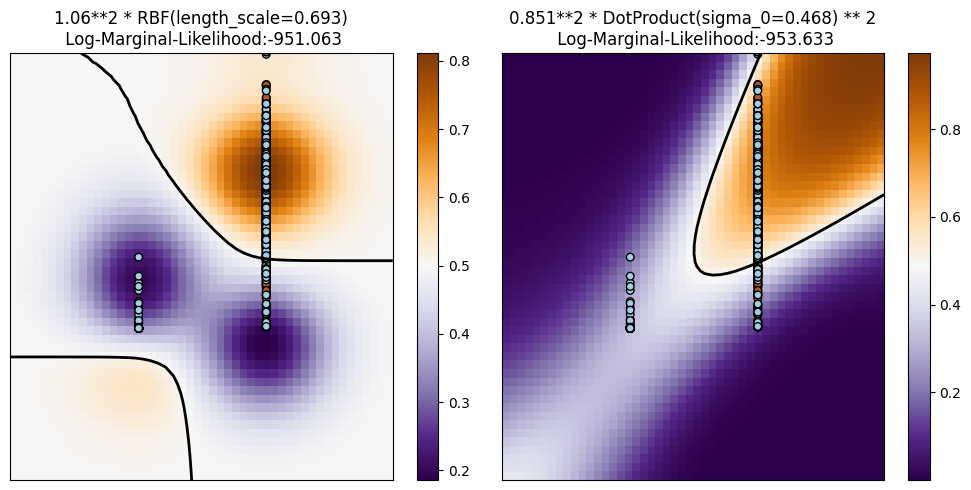

In [645]:
# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
X = XX.drop(columns=['no_of_workers','over_time', 'smv'])
X = scale.fit_transform(X)
y = prod7['productivity']

# fit the model
plt.figure(figsize=(10, 5))
kernels = [1.0 * RBF(length_scale=1.15), 1.0 * DotProduct(sigma_0=1.0) ** 2]
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, y)

    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, i + 1)
    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors=["k"])
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(
        "%s\n Log-Marginal-Likelihood:%.3f"
        % (clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),
        fontsize=12,
    )

plt.tight_layout()
plt.show()

In [646]:
sp = time.time()
time_taken = (sp-st)/60
print("time_taken is: %0.1f Minutes" % (time_taken))

time_taken is: 3.6 Minutes
